# Nutrition Prediction

## Import Packages and Load Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid", palette="pastel")
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('Data Set baby nutrition classification.csv')

In [ ]:
df

,NO,NAMA BALITA,JENIS KELAMIN,UMUR,BERAT(KG),TINGGI (CM),TINGGI(M),TINGGI M2,BMI,STATUS GIZI
0,1,Adhe Fitri,P,24,5.8,65.0,0.650,0.42,13.73,GIZI_KURANG
1,2,Andi Hariati,P,24,5.5,59.0,0.590,0.35,15.80,GIZI_NORMAL
2,3,Anwar Amir,L,28,6.7,71.5,0.715,0.51,13.11,GIZI_KURANG
3,4,Asmar,L,30,8.1,72.5,0.725,0.53,15.41,GIZI_NORMAL
4,5,Eka Andriyani,P,28,6.9,73.0,0.730,0.53,12.95,GIZI_KURANG
...,...,...,...,...,...,...,...,...,...,...
195,196,danss,P,36,6.6,64.0,0.640,0.41,16.11,GIZI_NORMAL
196,197,sama,L,38,9.0,76.0,0.760,0.58,15.58,GIZI_NORMAL
197,198,mita,P,42,12.0,75.0,0.750,0.56,21.33,GIZI_NORMAL
198,199,unta,L,44,11.0,74.0,0.740,0.55,20.09,GIZI_NORMAL


## Data Understanding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NO             200 non-null    int64  
 1   NAMA BALITA    200 non-null    object 
 2   JENIS KELAMIN  200 non-null    object 
 3   UMUR           200 non-null    int64  
 4   BERAT(KG)      200 non-null    float64
 5   TINGGI (CM)    200 non-null    float64
 6   TINGGI(M)      200 non-null    float64
 7   TINGGI M2      200 non-null    float64
 8   BMI            200 non-null    float64
 9   STATUS GIZI    200 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 15.8+ KB


oke datanya bersih

In [ ]:
df.head()

,NO,NAMA BALITA,JENIS KELAMIN,UMUR,BERAT(KG),TINGGI (CM),TINGGI(M),TINGGI M2,BMI,STATUS GIZI
0,1,Adhe Fitri,P,24,5.8,65.0,0.650,0.42,13.73,GIZI_KURANG
1,2,Andi Hariati,P,24,5.5,59.0,0.590,0.35,15.80,GIZI_NORMAL
2,3,Anwar Amir,L,28,6.7,71.5,0.715,0.51,13.11,GIZI_KURANG
3,4,Asmar,L,30,8.1,72.5,0.725,0.53,15.41,GIZI_NORMAL
4,5,Eka Andriyani,P,28,6.9,73.0,0.730,0.53,12.95,GIZI_KURANG


In [ ]:
#statistik deskriptif
df.describe()

,NO,UMUR,BERAT(KG),TINGGI (CM),TINGGI(M),TINGGI M2,BMI
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,32.405000,8.741000,73.242500,0.732425,0.547450,17.261300
std,57.879185,8.927456,2.200895,10.774525,0.107745,0.157627,6.693594
min,1.000000,4.000000,1.000000,49.000000,0.490000,0.240000,1.730000
25%,50.750000,24.000000,7.600000,65.750000,0.657500,0.435000,12.767500
50%,100.500000,33.000000,8.900000,75.000000,0.750000,0.560000,15.810000
75%,150.250000,38.250000,10.000000,78.000000,0.780000,0.610000,20.792500
max,200.000000,54.000000,14.000000,98.000000,0.980000,0.960000,40.800000


In [ ]:
#statistik deskriptif
df.describe(include='O')

,NAMA BALITA,JENIS KELAMIN,STATUS GIZI
count,200,200,200
unique,177,2,4
top,jia,P,GIZI_NORMAL
freq,5,101,88


ada 4 classes untuk target variabelnya

In [ ]:
#cek data duplikat
df.duplicated().sum()

0

ga ada data duplikat

In [ ]:
#cek missing value
df.isna().sum()

NO               0
NAMA BALITA      0
JENIS KELAMIN    0
UMUR             0
BERAT(KG)        0
TINGGI (CM)      0
TINGGI(M)        0
TINGGI M2        0
BMI              0
STATUS GIZI      0
dtype: int64

In [ ]:
#membuat feature status bmi
def status_gizi(bmi):
    if bmi < 18.5:
        return 'Kurus'
    elif 18.5 <= bmi < 24.9:
        return 'Normal'
    elif 24.9 <= bmi < 29.9:
        return 'Gemuk'
    else:
        return 'Obesitas'

df['STATUS BMI'] = df['BMI'].apply(status_gizi)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NO             200 non-null    int64  
 1   NAMA BALITA    200 non-null    object 
 2   JENIS KELAMIN  200 non-null    object 
 3   UMUR           200 non-null    int64  
 4   BERAT(KG)      200 non-null    float64
 5   TINGGI (CM)    200 non-null    float64
 6   TINGGI(M)      200 non-null    float64
 7   TINGGI M2      200 non-null    float64
 8   BMI            200 non-null    float64
 9   STATUS GIZI    200 non-null    object 
 10  STATUS BMI     200 non-null    object 
dtypes: float64(5), int64(2), object(4)
memory usage: 17.3+ KB


In [ ]:
df.describe()

,NO,UMUR,BERAT(KG),TINGGI (CM),TINGGI(M),TINGGI M2,BMI
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,32.405000,8.741000,73.242500,0.732425,0.547450,17.261300
std,57.879185,8.927456,2.200895,10.774525,0.107745,0.157627,6.693594
min,1.000000,4.000000,1.000000,49.000000,0.490000,0.240000,1.730000
25%,50.750000,24.000000,7.600000,65.750000,0.657500,0.435000,12.767500
50%,100.500000,33.000000,8.900000,75.000000,0.750000,0.560000,15.810000
75%,150.250000,38.250000,10.000000,78.000000,0.780000,0.610000,20.792500
max,200.000000,54.000000,14.000000,98.000000,0.980000,0.960000,40.800000


In [ ]:
df.describe(include='O')

,NAMA BALITA,JENIS KELAMIN,STATUS GIZI,STATUS BMI
count,200,200,200,200
unique,177,2,4,4
top,jia,P,GIZI_NORMAL,Kurus
freq,5,101,88,133


### Exploratory Data Analysis

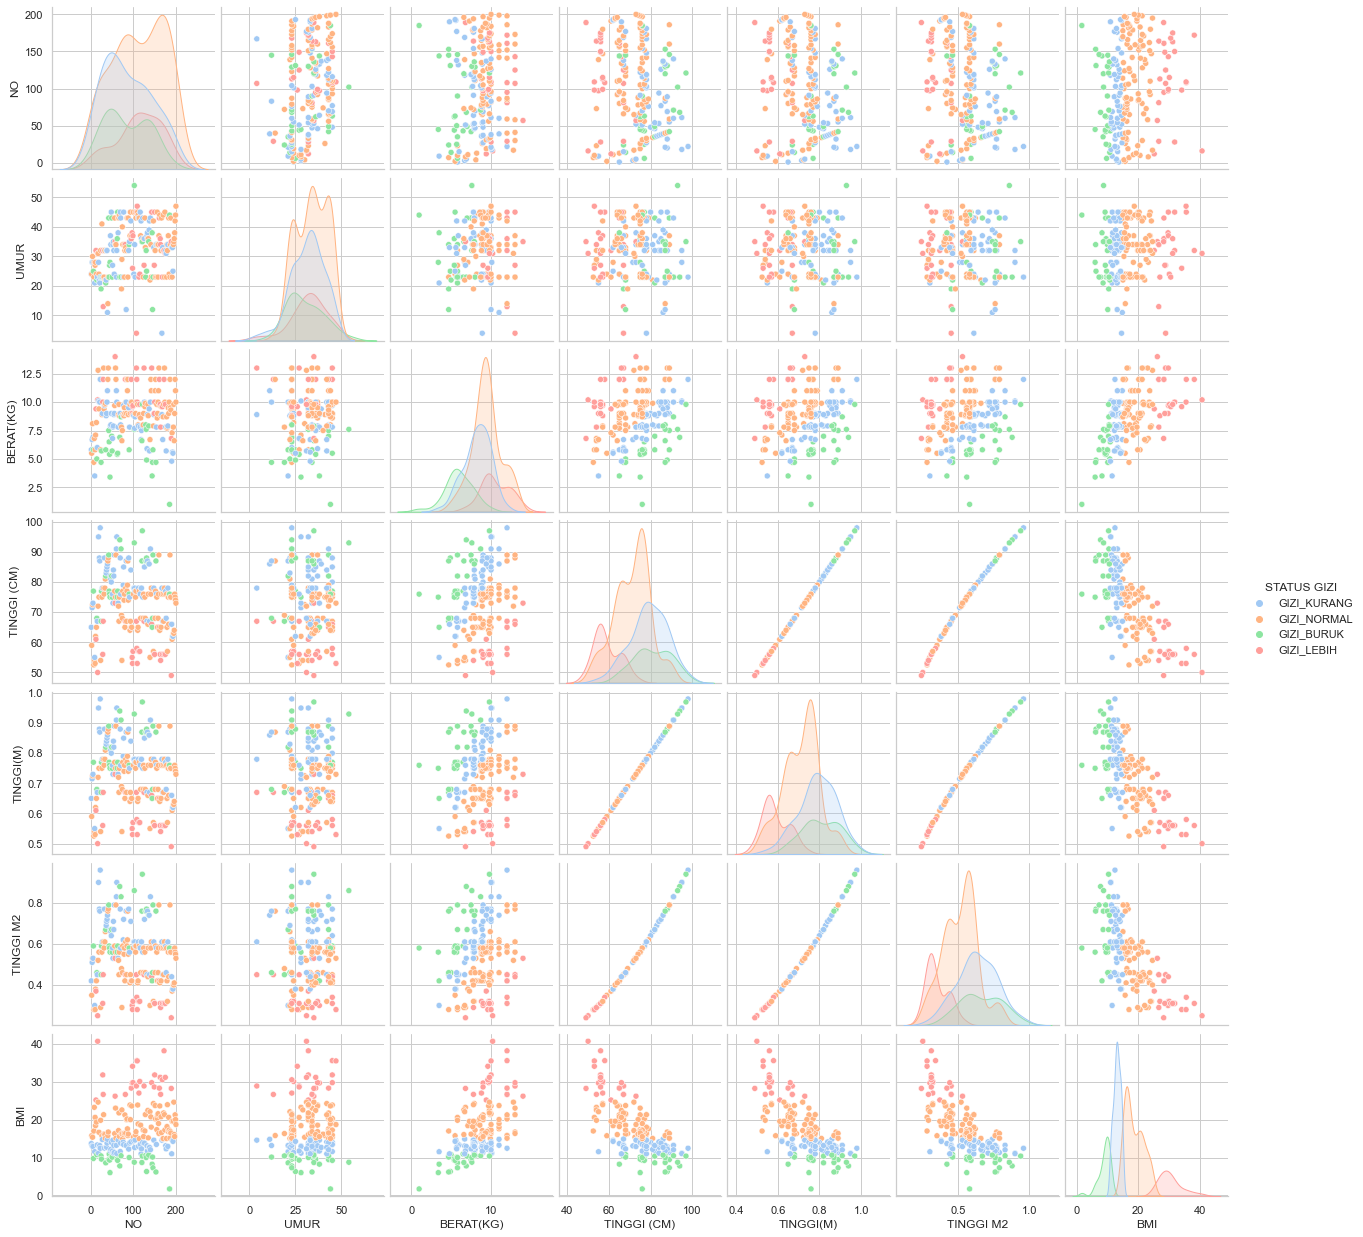

In [ ]:
sns.pairplot(df, hue='STATUS GIZI')

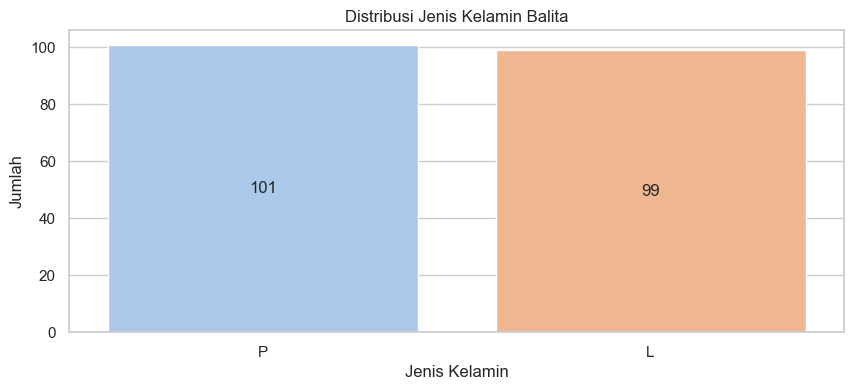

In [ ]:
plt.figure(figsize=(10,4),dpi=100)
a = sns.countplot(x='JENIS KELAMIN', data=df)
for j in a.containers:
    a.bar_label(j, label_type='center')
plt.title('Distribusi Jenis Kelamin Balita')
plt.xlabel('Jenis Kelamin')
plt.ylabel("Jumlah")
plt.show()

berimbang lah ya, coba kita liat berdasarkan status gizinya

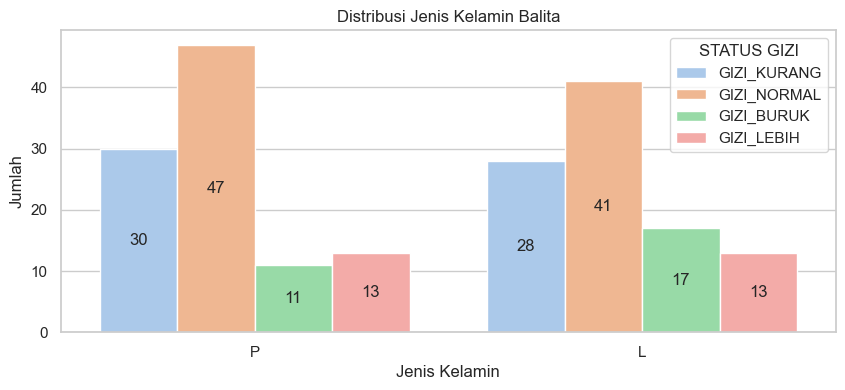

In [ ]:
plt.figure(figsize=(10,4),dpi=100)
a = sns.countplot(x='JENIS KELAMIN', data=df, hue='STATUS GIZI')
for j in a.containers:
    a.bar_label(j, label_type='center')
plt.title('Distribusi Jenis Kelamin Balita')
plt.xlabel('Jenis Kelamin')
plt.ylabel("Jumlah")
plt.show()

OHOO yg laki laki memiliki kecenderungan gizi buruk lebih dari perempuan

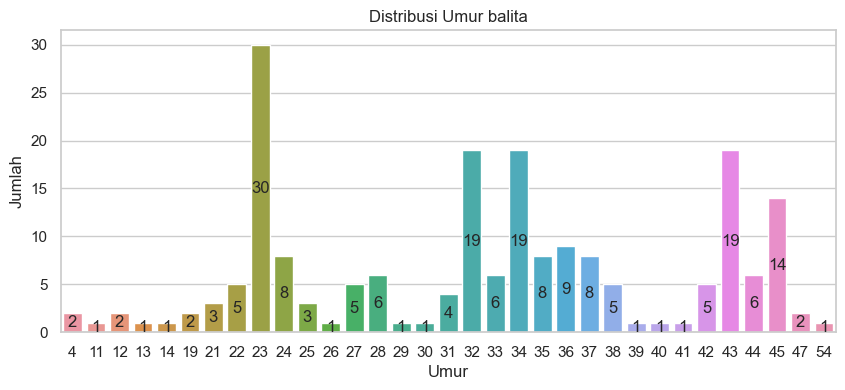

In [ ]:
plt.figure(figsize=(10,4),dpi=100)
a = sns.countplot(x='UMUR', data=df)
for j in a.containers:
    a.bar_label(j, label_type='center')
plt.title('Distribusi Umur balita')
plt.xlabel('Umur')
plt.ylabel("Jumlah")
plt.show()

kita bikin histogram aja ygy

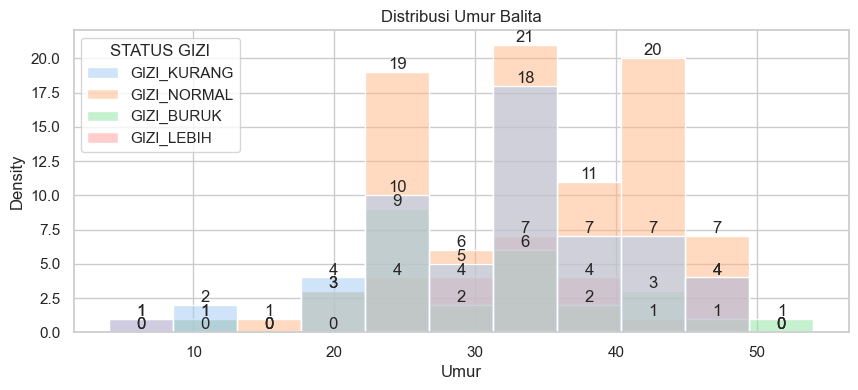

In [ ]:
plt.figure(figsize=(10,4), dpi=100)
a = sns.histplot(x='UMUR', data=df, hue='STATUS GIZI')
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.title('Distribusi Umur Balita')
plt.xlabel('Umur')
plt.ylabel("Density")
plt.show()

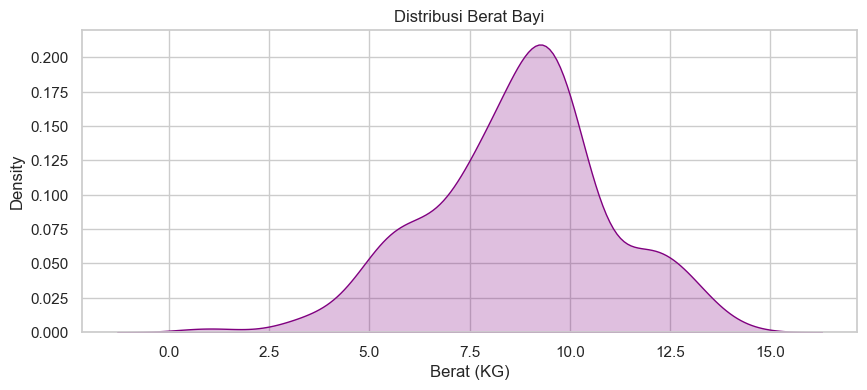

In [ ]:
plt.figure(figsize=(10,4), dpi=100)
sns.kdeplot(x='BERAT(KG)', data=df, fill=True, color='purple')
plt.title('Distribusi Berat Bayi')
plt.xlabel('Berat (KG)')
plt.ylabel("Density")
plt.show()

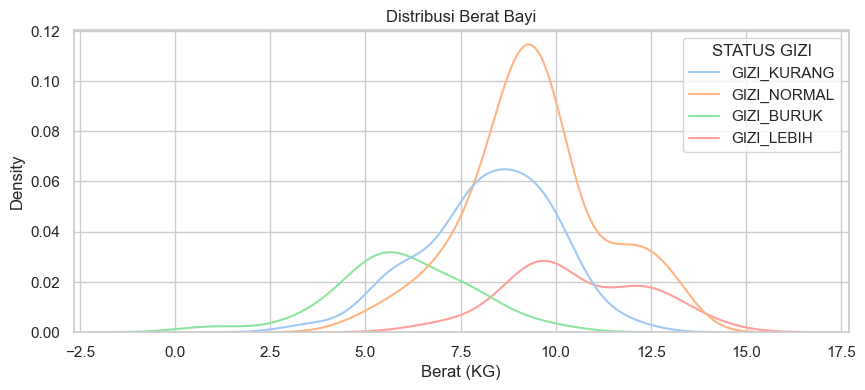

In [ ]:
plt.figure(figsize=(10,4), dpi=100)
sns.kdeplot(x='BERAT(KG)', data=df, hue='STATUS GIZI')
plt.title('Distribusi Berat Bayi')
plt.xlabel('Berat (KG)')
plt.ylabel("Density")
plt.show()

hmmm keliatannya yg gizi buruk itu memiliki kecenderungan berat yang kurang yaa dibandingkan status gizi yang lain

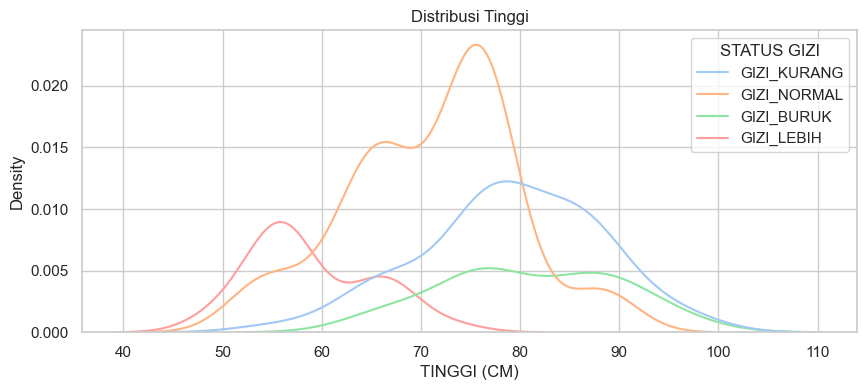

In [ ]:
plt.figure(figsize=(10,4), dpi=100)
sns.kdeplot(x='TINGGI (CM)', data=df, hue='STATUS GIZI')
plt.title('Distribusi Tinggi')
plt.xlabel('TINGGI (CM)')
plt.ylabel("Density")
plt.show()

menarik, tetapi yang gizi kurang dan buruk memiliki kecenderungan tinggi yang lebih dibandingkan status gizi lain dan gizi lebih malah pendek

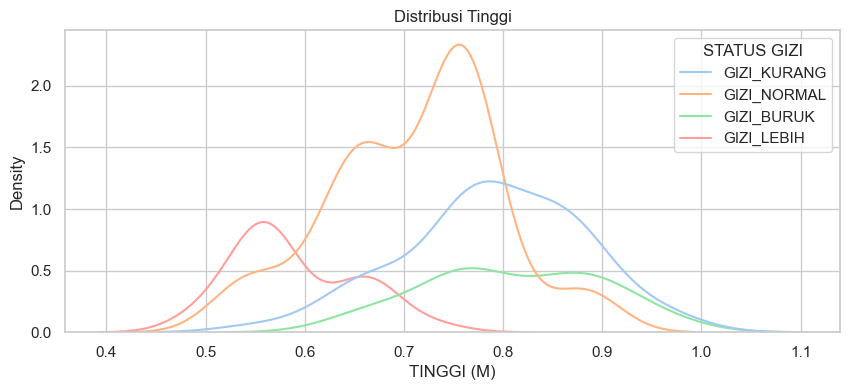

In [ ]:
plt.figure(figsize=(10,4), dpi=100)
sns.kdeplot(x='TINGGI(M)', data=df, hue='STATUS GIZI')
plt.title('Distribusi Tinggi')
plt.xlabel('TINGGI (M)')
plt.ylabel("Density")
plt.show()

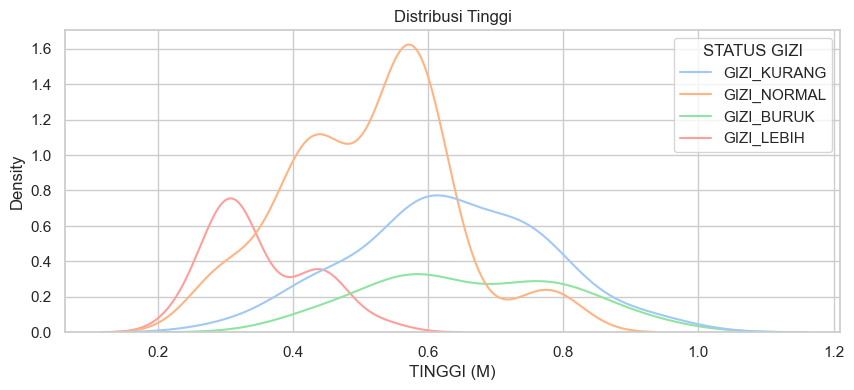

In [ ]:
plt.figure(figsize=(10,4), dpi=100)
sns.kdeplot(x='TINGGI M2', data=df, hue='STATUS GIZI')
plt.title('Distribusi Tinggi')
plt.xlabel('TINGGI (M)')
plt.ylabel("Density")
plt.show()

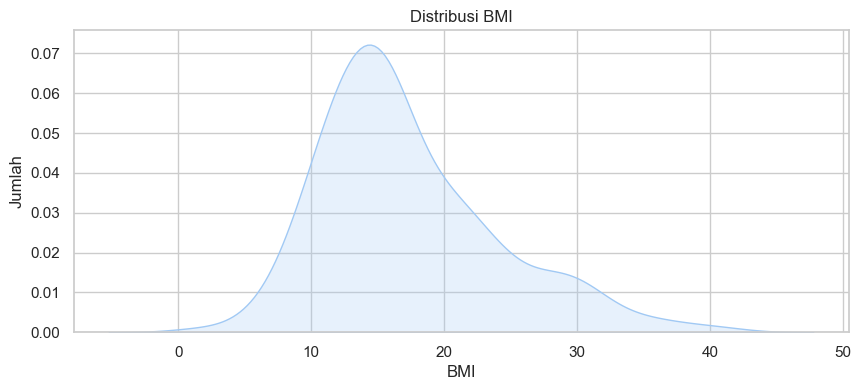

In [ ]:
plt.figure(figsize=(10,4),dpi=100)
sns.kdeplot(x='BMI', data=df, fill=True)
plt.title('Distribusi BMI')
plt.xlabel('BMI')
plt.ylabel("Jumlah")
plt.show()

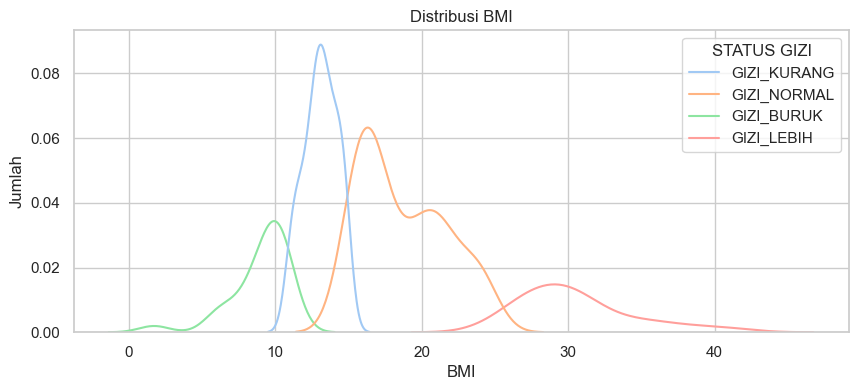

In [ ]:
plt.figure(figsize=(10,4),dpi=100)
sns.kdeplot(x='BMI', data=df, hue='STATUS GIZI')
plt.title('Distribusi BMI')
plt.xlabel('BMI')
plt.ylabel("Jumlah")
plt.show()

ada ya polanya, yang gizinya buruk bmi-nya rendah dan yang gizinya lebih bmi-nya tinggi

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NO             200 non-null    int64  
 1   NAMA BALITA    200 non-null    object 
 2   JENIS KELAMIN  200 non-null    object 
 3   UMUR           200 non-null    int64  
 4   BERAT(KG)      200 non-null    float64
 5   TINGGI (CM)    200 non-null    float64
 6   TINGGI(M)      200 non-null    float64
 7   TINGGI M2      200 non-null    float64
 8   BMI            200 non-null    float64
 9   STATUS GIZI    200 non-null    object 
 10  STATUS BMI     200 non-null    object 
dtypes: float64(5), int64(2), object(4)
memory usage: 17.3+ KB


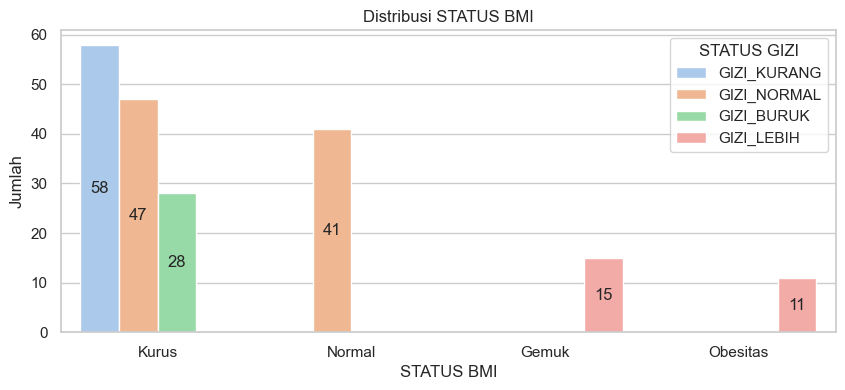

In [ ]:
plt.figure(figsize=(10,4),dpi=100)
a= sns.countplot(x='STATUS BMI', data=df, hue='STATUS GIZI')
for j in a.containers:
    a.bar_label(j, label_type='center')
plt.title('Distribusi STATUS BMI')
plt.xlabel('STATUS BMI')
plt.ylabel("Jumlah")
plt.show()

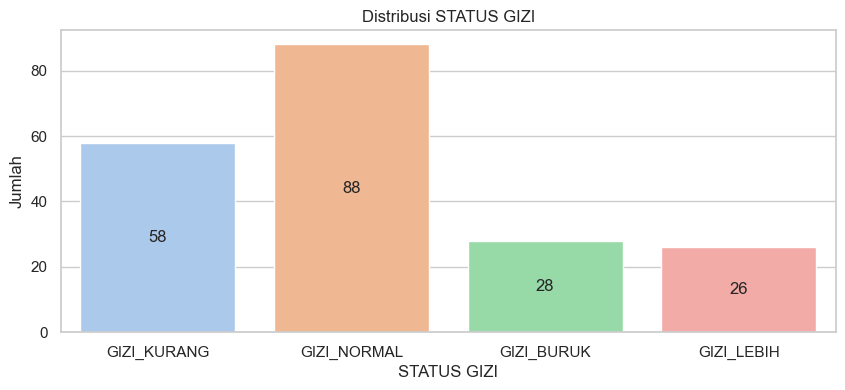

In [ ]:
plt.figure(figsize=(10,4),dpi=100)
a= sns.countplot(x='STATUS GIZI', data=df)
for j in a.containers:
    a.bar_label(j, label_type='center')
plt.title('Distribusi STATUS GIZI')
plt.xlabel('STATUS GIZI')
plt.ylabel("Jumlah")
plt.show()

In [ ]:
#mnghapus fature NO
df = df.drop(columns=['NO', 'NAMA BALITA'])

In [ ]:
df_korelasi = df.corr()
df_korelasi

,UMUR,BERAT(KG),TINGGI (CM),TINGGI(M),TINGGI M2,BMI
UMUR,1.000000,0.037693,-0.039711,-0.039711,-0.051042,0.073234
BERAT(KG),0.037693,1.000000,0.158171,0.158171,0.160507,0.540675
TINGGI (CM),-0.039711,0.158171,1.000000,1.000000,0.996290,-0.704624
TINGGI(M),-0.039711,0.158171,1.000000,1.000000,0.996290,-0.704624
TINGGI M2,-0.051042,0.160507,0.996290,0.996290,1.000000,-0.686331
BMI,0.073234,0.540675,-0.704624,-0.704624,-0.686331,1.000000


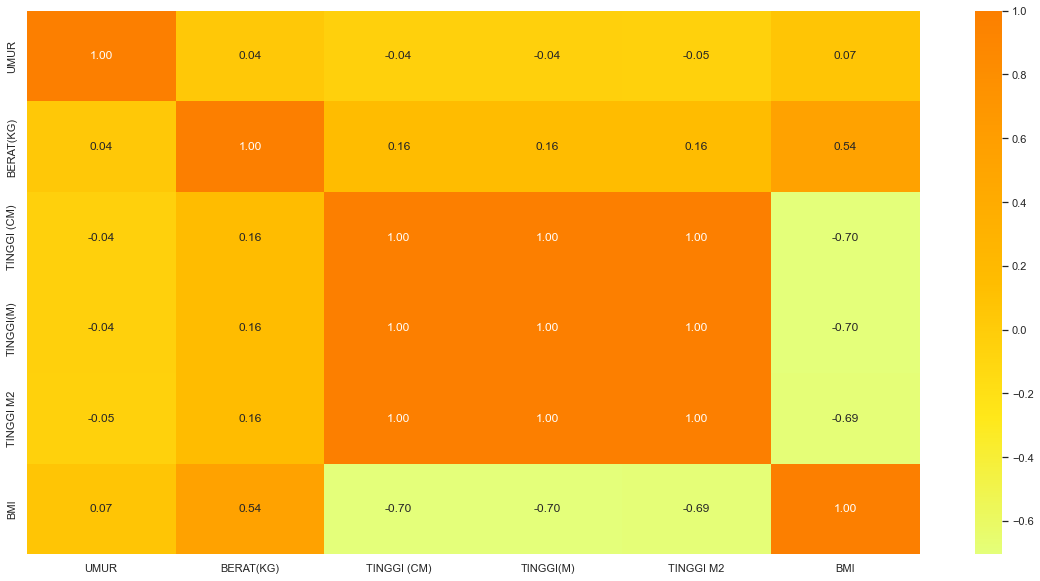

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Wistia')
plt.show()

Korelasi positif (nilai mendekati +1): Ketika nilai satu variabel meningkat, nilai variabel lain juga cenderung meningkat.
Korelasi negatif (nilai mendekati -1): Ketika nilai satu variabel meningkat, nilai variabel lain cenderung menurun.
Korelasi nol (nilai mendekati 0): Tidak ada hubungan linier yang jelas antara dua variabel.
Berikut adalah interpretasi dari matriks korelasi yang diberikan:

UMUR dan BMI (0.073234):
Korelasi positif yang rendah antara umur dan BMI menunjukkan bahwa ada hubungan sedikit positif antara umur balita dengan indeks massa tubuh mereka. Namun, hubungannya tidak kuat.

BERAT(KG) dan BMI (0.540675):
Korelasi positif yang sedang antara berat badan dan BMI menunjukkan bahwa berat badan yang lebih tinggi cenderung berhubungan dengan nilai BMI yang lebih tinggi. Ini menunjukkan ada hubungan yang cukup kuat antara berat badan dan indeks massa tubuh.

TINGGI (CM) dan BMI (-0.704624):
Korelasi negatif yang kuat antara tinggi balita dalam sentimeter dan BMI menunjukkan bahwa tinggi balita yang lebih tinggi cenderung berhubungan dengan nilai BMI yang lebih rendah. Hal ini menandakan bahwa semakin tinggi balita, cenderung memiliki nilai BMI yang lebih rendah.

TINGGI(M) dan BMI (-0.704624):
Korelasi negatif yang kuat antara tinggi balita dalam meter dan BMI menunjukkan hubungan yang sama dengan hubungan antara tinggi dalam sentimeter dan BMI. Ini karena kolom "TINGGI (CM)" dan "TINGGI(M)" menyimpan data yang sama, hanya dalam satuan yang berbeda.

TINGGI M2 dan BMI (-0.686331):
Korelasi negatif yang kuat antara tinggi balita dalam meter kuadrat dan BMI menunjukkan hubungan serupa dengan hubungan antara tinggi balita dalam sentimeter/meter dan BMI. Tinggi dalam meter kuadrat adalah hasil dari perkalian tinggi dalam meter dengan tinggi dalam meter, sehingga hubungannya kuat dengan BMI.

Secara keseluruhan, korelasi yang paling menonjol adalah antara berat badan dan BMI, serta antara tinggi balita dan BMI. Korelasi ini dapat memberikan wawasan tentang bagaimana berat badan dan tinggi balita berhubungan dengan indeks massa tubuh mereka, yang penting dalam analisis status gizi.

## Data Preprocessing

### Pisahkan Data Untuk Preprocess

In [ ]:
df.columns

Index(['JENIS KELAMIN', 'UMUR', 'BERAT(KG)', 'TINGGI (CM)', 'TINGGI(M)',
       'TINGGI M2', 'BMI', 'STATUS GIZI', 'STATUS BMI'],
      dtype='object')

In [ ]:
#memisahkan data untuk input model data target
input_cols = ['JENIS KELAMIN', 'UMUR', 'BERAT(KG)', 'TINGGI (CM)', 'BMI', 'STATUS BMI']
target_col = 'STATUS GIZI'

In [ ]:
input_cols

['JENIS KELAMIN', 'UMUR', 'BERAT(KG)', 'TINGGI (CM)', 'BMI', 'STATUS BMI']

In [ ]:
target_col

'STATUS GIZI'

In [ ]:
#memisahkan data numeric dan data categoric untuk dilakukan preprocess
numeric_cols = df[input_cols].select_dtypes(np.number).columns.to_list()
categorical_cols = df[input_cols].select_dtypes(include='object').columns.to_list()

In [ ]:
numeric_cols

['UMUR', 'BERAT(KG)', 'TINGGI (CM)', 'BMI']

In [ ]:
categorical_cols

['JENIS KELAMIN', 'STATUS BMI']

### Check Outlier

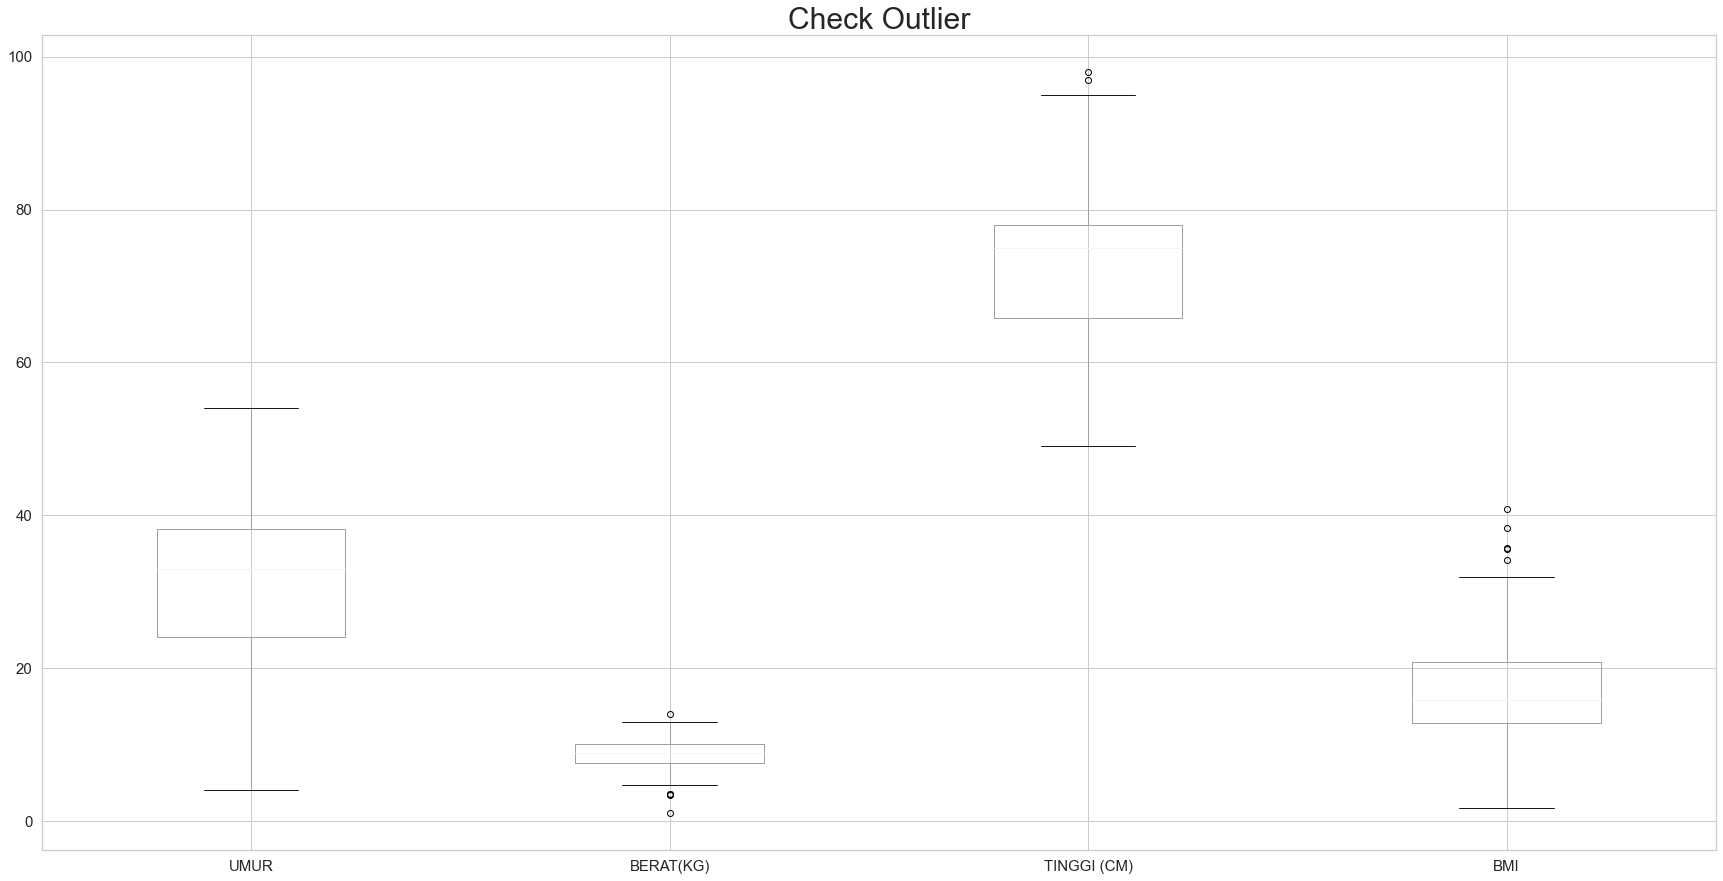

In [ ]:
df[numeric_cols].boxplot(figsize=(30,15), fontsize=15)
plt.title("Check Outlier", fontsize=30)
plt.show()

In [ ]:
df.describe()

,UMUR,BERAT(KG),TINGGI (CM),TINGGI(M),TINGGI M2,BMI
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,32.405000,8.741000,73.242500,0.732425,0.547450,17.261300
std,8.927456,2.200895,10.774525,0.107745,0.157627,6.693594
min,4.000000,1.000000,49.000000,0.490000,0.240000,1.730000
25%,24.000000,7.600000,65.750000,0.657500,0.435000,12.767500
50%,33.000000,8.900000,75.000000,0.750000,0.560000,15.810000
75%,38.250000,10.000000,78.000000,0.780000,0.610000,20.792500
max,54.000000,14.000000,98.000000,0.980000,0.960000,40.800000


In [ ]:
df.BMI.sort_values(ascending=False).head(10)

15     40.80
171    38.27
107    35.67
108    35.60
97     34.18
149    31.89
27     31.89
174    31.25
162    31.25
167    30.61
Name: BMI, dtype: float64

sepertinya tidak ada outlier yaa

### Feature Scaling

In [ ]:
#statistik deskriptif sebelum scaling
df[numeric_cols].describe()

,UMUR,BERAT(KG),TINGGI (CM),BMI
count,200.000000,200.000000,200.000000,200.000000
mean,32.405000,8.741000,73.242500,17.261300
std,8.927456,2.200895,10.774525,6.693594
min,4.000000,1.000000,49.000000,1.730000
25%,24.000000,7.600000,65.750000,12.767500
50%,33.000000,8.900000,75.000000,15.810000
75%,38.250000,10.000000,78.000000,20.792500
max,54.000000,14.000000,98.000000,40.800000


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(df[numeric_cols])

StandardScaler()

In [ ]:
df[numeric_cols] = scaler.transform(df[numeric_cols])

In [ ]:
#statistik deskriptif setelah scaling
df[numeric_cols].describe()

,UMUR,BERAT(KG),TINGGI (CM),BMI
count,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02
mean,-1.343370e-16,7.605028e-17,-6.267729e-16,-3.511080e-16
std,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00
min,-3.189742e+00,-3.526032e+00,-2.255629e+00,-2.326146e+00
25%,-9.438402e-01,-5.197264e-01,-6.971353e-01,-6.730430e-01
50%,6.681557e-02,7.242463e-02,1.635256e-01,-2.173633e-01
75%,6.563648e-01,5.734755e-01,4.426588e-01,5.288730e-01
max,2.425012e+00,2.395479e+00,2.303547e+00,3.525426e+00


### One Hot Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [ ]:
encoder.fit(df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [ ]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [ ]:
df[encoded_cols] = encoder.transform(df[categorical_cols])

In [ ]:
encoder.categories_

[array(['L', 'P'], dtype=object),
 array(['Gemuk', 'Kurus', 'Normal', 'Obesitas'], dtype=object)]

### Handling Imbalance

In [ ]:
#handling imbalance
X = df[numeric_cols + encoded_cols]
X

,UMUR,BERAT(KG),TINGGI (CM),BMI,JENIS KELAMIN_L,JENIS KELAMIN_P,STATUS BMI_Gemuk,STATUS BMI_Kurus,STATUS BMI_Normal,STATUS BMI_Obesitas
0,-0.943840,-1.339628,-0.766919,-0.528888,0.0,1.0,0.0,1.0,0.0,0.0
1,-0.943840,-1.476278,-1.325185,-0.218861,0.0,1.0,0.0,1.0,0.0,0.0
2,-0.494660,-0.929677,-0.162130,-0.621746,1.0,0.0,0.0,1.0,0.0,0.0
3,-0.270070,-0.291976,-0.069085,-0.277272,1.0,0.0,0.0,1.0,0.0,0.0
4,-0.494660,-0.838577,-0.022563,-0.645710,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
195,0.403701,-0.975227,-0.859963,-0.172432,0.0,1.0,0.0,1.0,0.0,0.0
196,0.628291,0.117975,0.256570,-0.251811,1.0,0.0,0.0,1.0,0.0,0.0
197,1.077471,1.484477,0.163526,0.609375,0.0,1.0,0.0,0.0,1.0,0.0
198,1.302061,1.028976,0.070481,0.423659,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
y = df[target_col]
y

0      GIZI_KURANG
1      GIZI_NORMAL
2      GIZI_KURANG
3      GIZI_NORMAL
4      GIZI_KURANG
          ...     
195    GIZI_NORMAL
196    GIZI_NORMAL
197    GIZI_NORMAL
198    GIZI_NORMAL
199    GIZI_NORMAL
Name: STATUS GIZI, Length: 200, dtype: object

In [ ]:
y.value_counts()

GIZI_NORMAL    88
GIZI_KURANG    58
GIZI_BURUK     28
GIZI_LEBIH     26
Name: STATUS GIZI, dtype: int64

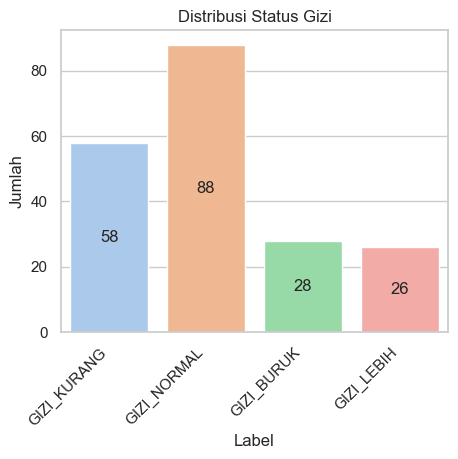

In [ ]:
plt.figure(figsize=(5,4), dpi=100)
a = sns.countplot(y)
for j in a.containers:
    a.bar_label(j, label_type="center")
plt.title("Distribusi Status Gizi")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Label")
plt.ylabel("Jumlah")
plt.show()

In [ ]:
#kita pake smotetomek aja biar beda
from imblearn.combine import SMOTETomek
from collections import Counter

X, y = SMOTETomek().fit_resample(X, y)
print(sorted(Counter(y).items()))

[('GIZI_BURUK', 88), ('GIZI_KURANG', 86), ('GIZI_LEBIH', 88), ('GIZI_NORMAL', 86)]


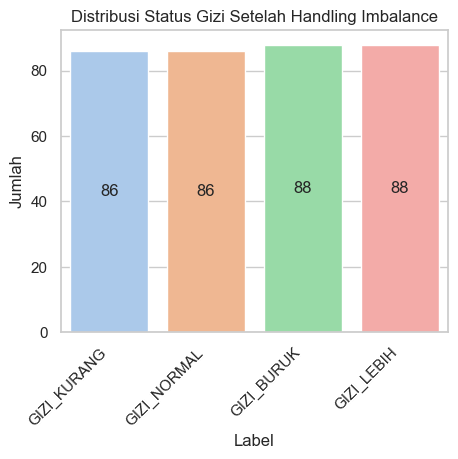

In [ ]:
plt.figure(figsize=(5,4), dpi=100)
a = sns.countplot(y)
for j in a.containers:
    a.bar_label(j, label_type="center")
plt.title("Distribusi Status Gizi Setelah Handling Imbalance")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Label")
plt.ylabel("Jumlah")
plt.show()

## Modeling

In [ ]:
X.head()

,UMUR,BERAT(KG),TINGGI (CM),BMI,JENIS KELAMIN_L,JENIS KELAMIN_P,STATUS BMI_Gemuk,STATUS BMI_Kurus,STATUS BMI_Normal,STATUS BMI_Obesitas
0,-0.94384,-1.339628,-0.766919,-0.528888,0.0,1.0,0.0,1.0,0.0,0.0
1,-0.94384,-1.476278,-1.325185,-0.218861,0.0,1.0,0.0,1.0,0.0,0.0
2,-0.49466,-0.929677,-0.162130,-0.621746,1.0,0.0,0.0,1.0,0.0,0.0
3,-0.27007,-0.291976,-0.069085,-0.277272,1.0,0.0,0.0,1.0,0.0,0.0
4,-0.49466,-0.838577,-0.022563,-0.645710,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
X_train.shape, y_train.shape

((261, 10), (261,))

In [ ]:
X_test.shape, y_test.shape

((87, 10), (87,))

### Decision Tree

In [ ]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(max_depth=5, random_state=42)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
dt_mod = model_dt.predict(X_test)
dt_mod

array(['GIZI_BURUK', 'GIZI_KURANG', 'GIZI_LEBIH', 'GIZI_KURANG',
       'GIZI_LEBIH', 'GIZI_NORMAL', 'GIZI_BURUK', 'GIZI_BURUK',
       'GIZI_KURANG', 'GIZI_NORMAL', 'GIZI_NORMAL', 'GIZI_NORMAL',
       'GIZI_LEBIH', 'GIZI_NORMAL', 'GIZI_KURANG', 'GIZI_BURUK',
       'GIZI_LEBIH', 'GIZI_LEBIH', 'GIZI_NORMAL', 'GIZI_KURANG',
       'GIZI_KURANG', 'GIZI_KURANG', 'GIZI_LEBIH', 'GIZI_KURANG',
       'GIZI_NORMAL', 'GIZI_NORMAL', 'GIZI_BURUK', 'GIZI_NORMAL',
       'GIZI_LEBIH', 'GIZI_NORMAL', 'GIZI_LEBIH', 'GIZI_BURUK',
       'GIZI_NORMAL', 'GIZI_BURUK', 'GIZI_BURUK', 'GIZI_NORMAL',
       'GIZI_BURUK', 'GIZI_NORMAL', 'GIZI_BURUK', 'GIZI_LEBIH',
       'GIZI_KURANG', 'GIZI_NORMAL', 'GIZI_KURANG', 'GIZI_BURUK',
       'GIZI_KURANG', 'GIZI_NORMAL', 'GIZI_KURANG', 'GIZI_BURUK',
       'GIZI_KURANG', 'GIZI_LEBIH', 'GIZI_LEBIH', 'GIZI_NORMAL',
       'GIZI_KURANG', 'GIZI_LEBIH', 'GIZI_BURUK', 'GIZI_KURANG',
       'GIZI_BURUK', 'GIZI_LEBIH', 'GIZI_KURANG', 'GIZI_NORMAL',
       'GIZI_LEBIH', '

In [ ]:
def dt_model(inputs, targets, name=''):
    pred_dt = model_dt.predict(inputs)
    accuracy_dt = accuracy_score(targets, pred_dt)
    print("Accuracy: {:.2f}%".format(accuracy_dt * 100))
    print('Precision: {:.2f}%'.format(precision_score(targets, pred_dt, average='weighted') * 100))
    print('Recall: {:.2f}%'.format(recall_score(targets, pred_dt, average='weighted') * 100))

    cm = confusion_matrix(targets, pred_dt, normalize='true')
    plt.figure()
    sns.heatmap(cm, annot=True, cmap='magma')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name))
    plt.show()
    return pred_dt

Accuracy: 100.00%
Precision: 100.00%
Recall: 100.00%


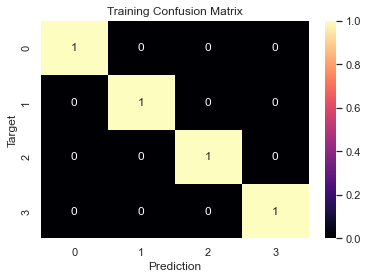

In [ ]:
# Train Decision Tree
train_dt = dt_model(X_train, y_train, 'Training')

Accuracy: 100.00%
Precision: 100.00%
Recall: 100.00%


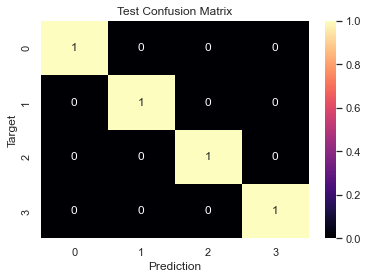

In [ ]:
dt_pred = dt_model(X_test, y_test, 'Test')

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

  GIZI_BURUK       1.00      1.00      1.00        20
 GIZI_KURANG       1.00      1.00      1.00        19
  GIZI_LEBIH       1.00      1.00      1.00        21
 GIZI_NORMAL       1.00      1.00      1.00        27

    accuracy                           1.00        87
   macro avg       1.00      1.00      1.00        87
weighted avg       1.00      1.00      1.00        87



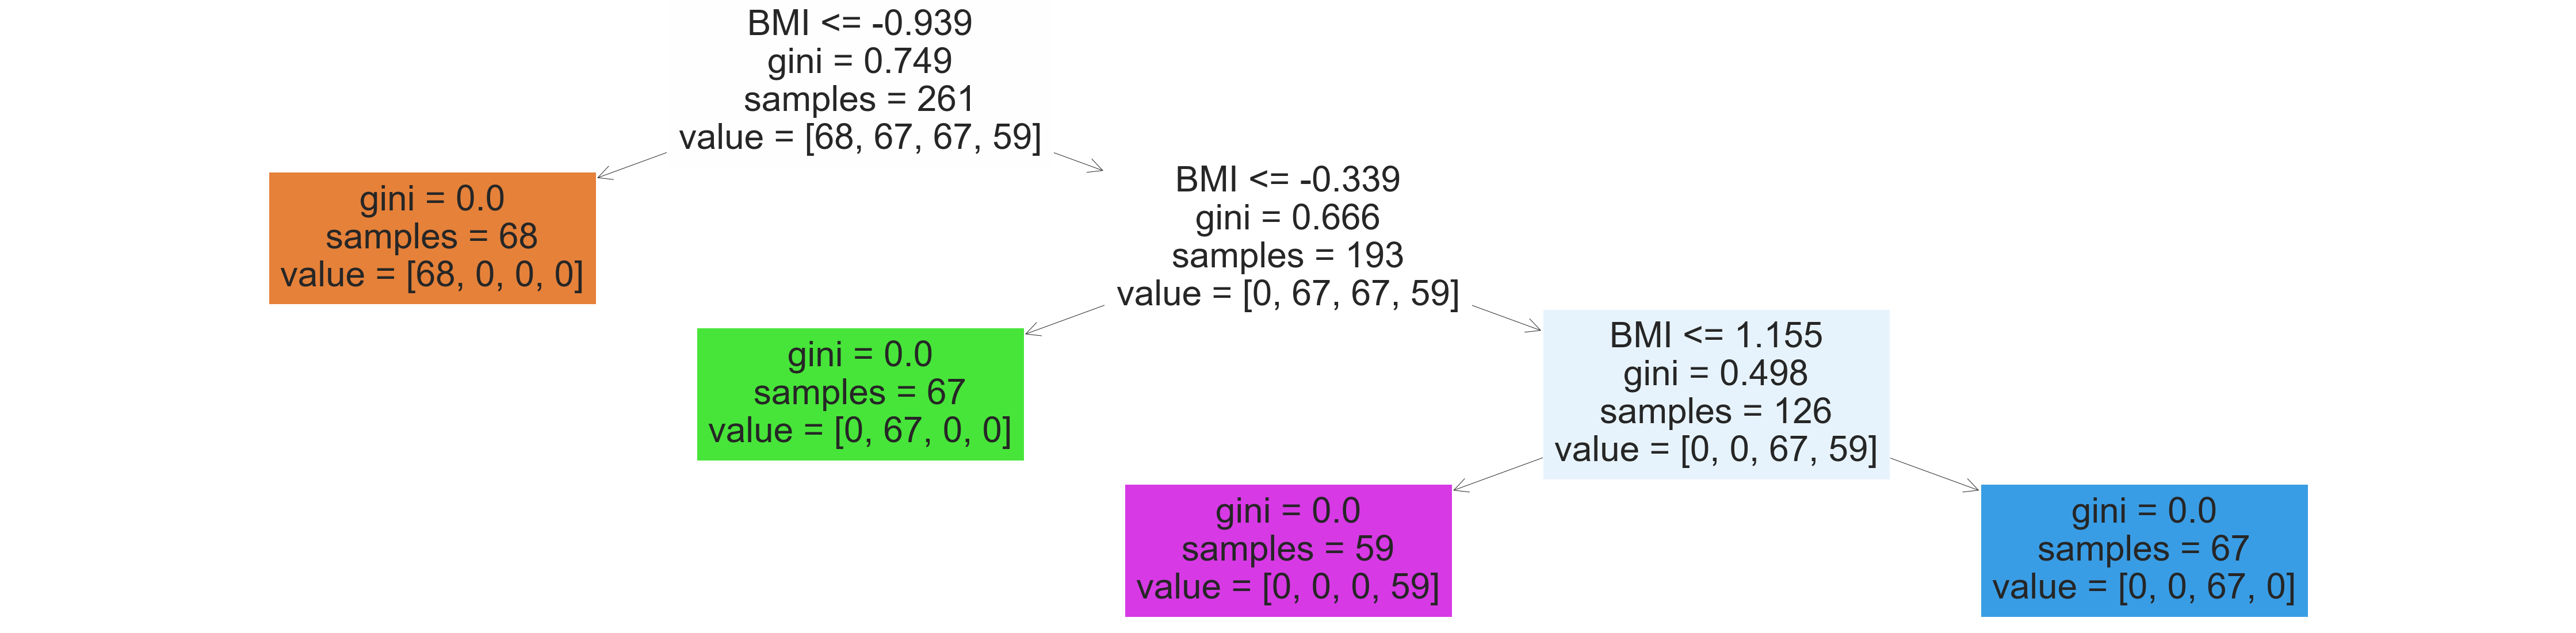

In [ ]:
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(80,20))
plot_tree(model_dt, feature_names=X_train.columns, filled=True);

### Random Forest

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(max_depth= 10, random_state = 1)
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=1)

In [ ]:
# Prediksi Random Forest
rf_mod = model_rf.predict(X_test)
rf_mod

array(['GIZI_BURUK', 'GIZI_KURANG', 'GIZI_LEBIH', 'GIZI_KURANG',
       'GIZI_LEBIH', 'GIZI_NORMAL', 'GIZI_BURUK', 'GIZI_BURUK',
       'GIZI_KURANG', 'GIZI_NORMAL', 'GIZI_NORMAL', 'GIZI_NORMAL',
       'GIZI_LEBIH', 'GIZI_NORMAL', 'GIZI_KURANG', 'GIZI_BURUK',
       'GIZI_LEBIH', 'GIZI_LEBIH', 'GIZI_NORMAL', 'GIZI_KURANG',
       'GIZI_KURANG', 'GIZI_KURANG', 'GIZI_LEBIH', 'GIZI_KURANG',
       'GIZI_NORMAL', 'GIZI_NORMAL', 'GIZI_BURUK', 'GIZI_NORMAL',
       'GIZI_LEBIH', 'GIZI_NORMAL', 'GIZI_LEBIH', 'GIZI_BURUK',
       'GIZI_NORMAL', 'GIZI_BURUK', 'GIZI_BURUK', 'GIZI_NORMAL',
       'GIZI_BURUK', 'GIZI_NORMAL', 'GIZI_BURUK', 'GIZI_LEBIH',
       'GIZI_KURANG', 'GIZI_NORMAL', 'GIZI_KURANG', 'GIZI_BURUK',
       'GIZI_KURANG', 'GIZI_NORMAL', 'GIZI_KURANG', 'GIZI_BURUK',
       'GIZI_KURANG', 'GIZI_LEBIH', 'GIZI_LEBIH', 'GIZI_NORMAL',
       'GIZI_KURANG', 'GIZI_LEBIH', 'GIZI_BURUK', 'GIZI_KURANG',
       'GIZI_BURUK', 'GIZI_LEBIH', 'GIZI_KURANG', 'GIZI_NORMAL',
       'GIZI_LEBIH', '

In [ ]:
def rf_model(inputs, targets, name=''):
    pred_rf = model_rf.predict(inputs)
    accuracy_rf = accuracy_score(targets,pred_rf)
    print("Accuracy : {:.2f}%".format(accuracy_rf * 100))
    print('Precison : {:.2f}%'.format(precision_score(targets, pred_rf, average='weighted') * 100))
    print('Recall   : {:.2f}%'.format(recall_score(targets, pred_rf, average='weighted') * 100))

    cm = confusion_matrix(targets, pred_rf, normalize='true')
    plt.figure()
    sns.heatmap(cm, annot=True, cmap='YlGn')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    return pred_rf

Accuracy : 100.00%
Precison : 100.00%
Recall   : 100.00%


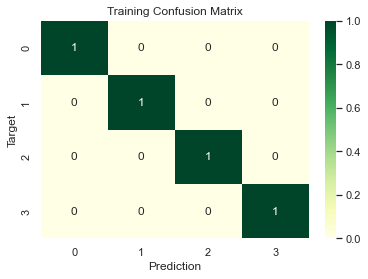

In [ ]:
# Training
train_rf = rf_model(X_train, y_train, 'Training')

Accuracy : 100.00%
Precison : 100.00%
Recall   : 100.00%


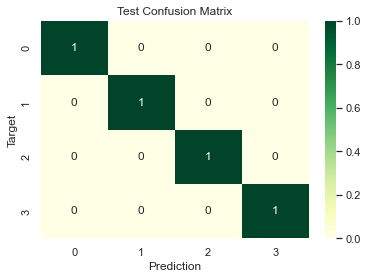

In [ ]:
# Prediksi Random Forest
pred_rf = rf_model(X_test, y_test, 'Test')

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

  GIZI_BURUK       1.00      1.00      1.00        20
 GIZI_KURANG       1.00      1.00      1.00        19
  GIZI_LEBIH       1.00      1.00      1.00        21
 GIZI_NORMAL       1.00      1.00      1.00        27

    accuracy                           1.00        87
   macro avg       1.00      1.00      1.00        87
weighted avg       1.00      1.00      1.00        87



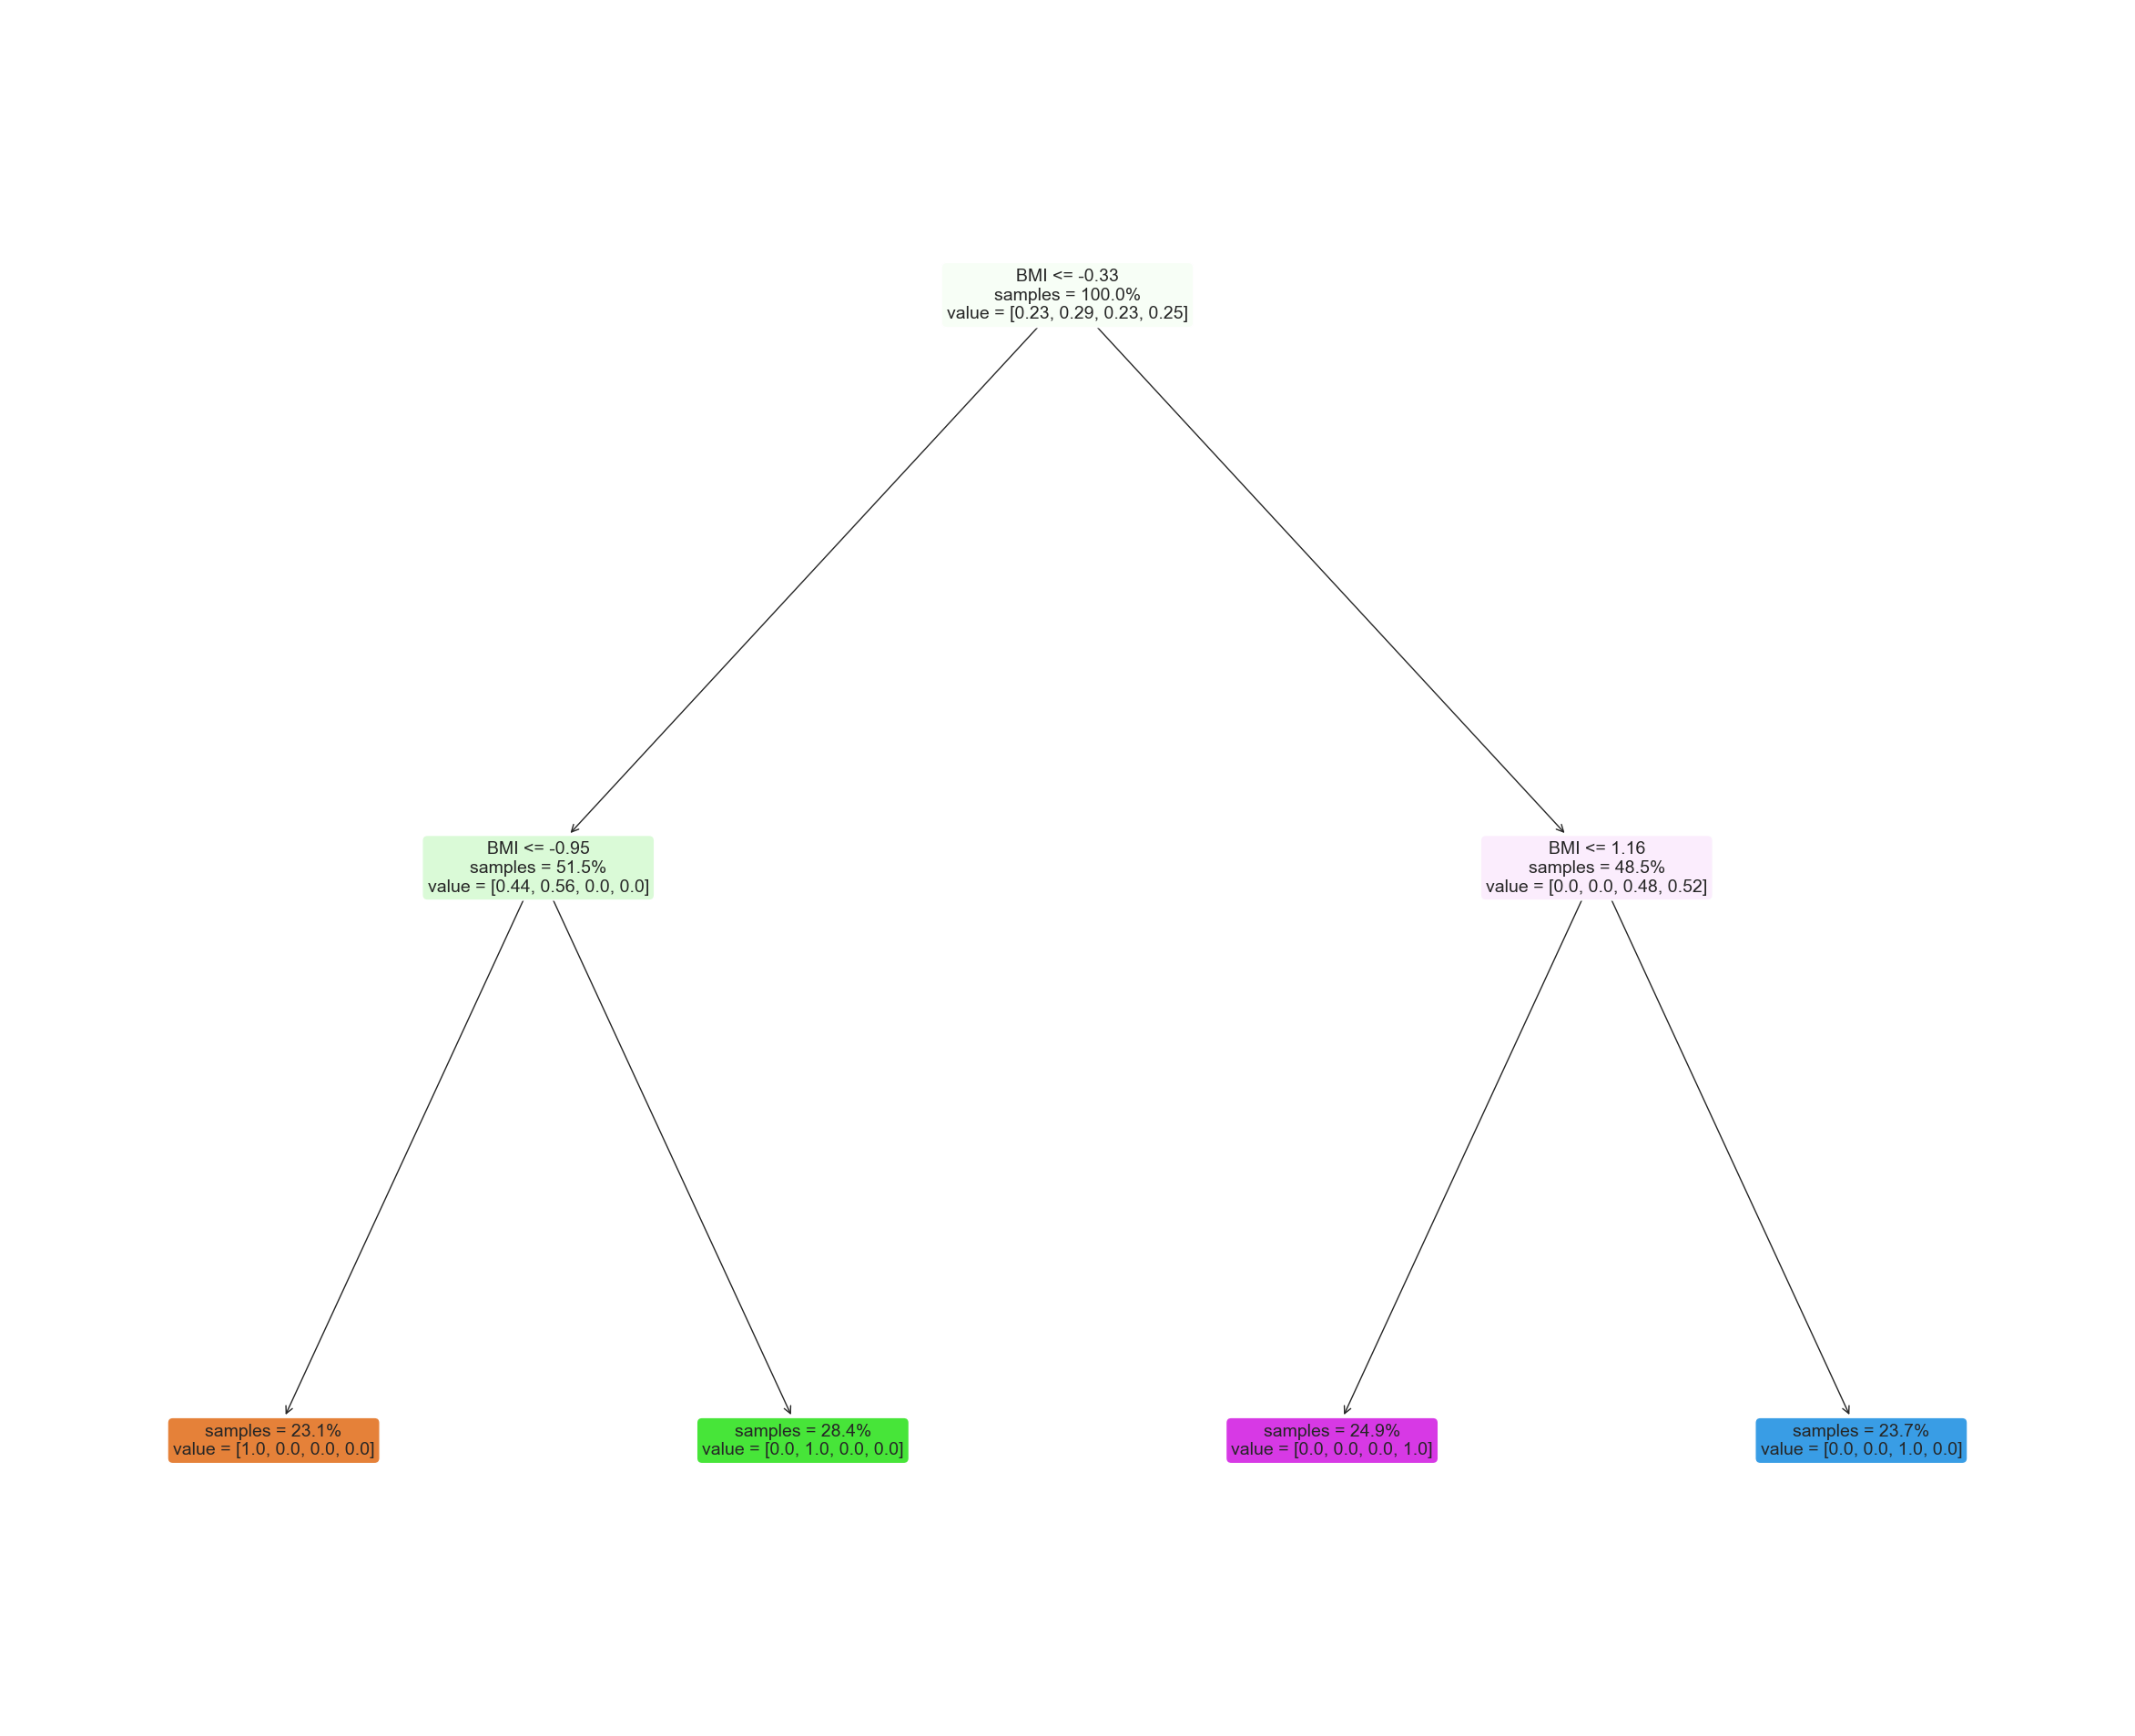

In [ ]:
# Graph Model
from sklearn import tree
plt.figure(figsize=(30,25), dpi=100)
tree.plot_tree(model_rf.estimators_[0], filled=True, rounded=True, feature_names=X.columns, fontsize=14, max_depth=5, impurity=False, proportion=True, precision=2, label='all')
plt.show()

### Extra Tree Classifier

In [ ]:
#extra tree
from sklearn.ensemble import ExtraTreesClassifier
et_model = ExtraTreesClassifier(random_state=1, n_jobs=-1, max_depth=10)
et_model.fit(X_train, y_train)

ExtraTreesClassifier(max_depth=10, n_jobs=-1, random_state=1)

In [ ]:
et_preds = et_model.predict(X_test)
et_preds

array(['GIZI_BURUK', 'GIZI_KURANG', 'GIZI_LEBIH', 'GIZI_KURANG',
       'GIZI_LEBIH', 'GIZI_NORMAL', 'GIZI_BURUK', 'GIZI_BURUK',
       'GIZI_KURANG', 'GIZI_NORMAL', 'GIZI_NORMAL', 'GIZI_NORMAL',
       'GIZI_LEBIH', 'GIZI_NORMAL', 'GIZI_KURANG', 'GIZI_BURUK',
       'GIZI_LEBIH', 'GIZI_LEBIH', 'GIZI_NORMAL', 'GIZI_KURANG',
       'GIZI_KURANG', 'GIZI_KURANG', 'GIZI_LEBIH', 'GIZI_KURANG',
       'GIZI_NORMAL', 'GIZI_NORMAL', 'GIZI_BURUK', 'GIZI_NORMAL',
       'GIZI_LEBIH', 'GIZI_NORMAL', 'GIZI_LEBIH', 'GIZI_BURUK',
       'GIZI_NORMAL', 'GIZI_BURUK', 'GIZI_BURUK', 'GIZI_NORMAL',
       'GIZI_BURUK', 'GIZI_NORMAL', 'GIZI_BURUK', 'GIZI_LEBIH',
       'GIZI_KURANG', 'GIZI_NORMAL', 'GIZI_KURANG', 'GIZI_BURUK',
       'GIZI_KURANG', 'GIZI_NORMAL', 'GIZI_KURANG', 'GIZI_BURUK',
       'GIZI_KURANG', 'GIZI_LEBIH', 'GIZI_LEBIH', 'GIZI_KURANG',
       'GIZI_KURANG', 'GIZI_LEBIH', 'GIZI_BURUK', 'GIZI_KURANG',
       'GIZI_BURUK', 'GIZI_LEBIH', 'GIZI_KURANG', 'GIZI_NORMAL',
       'GIZI_LEBIH', '

In [ ]:
def model_et(inputs, targets, name='' ):
    pred_et = et_model.predict(inputs)
    accuracy_et = accuracy_score(targets, pred_et)
    print("Accuracy : {:.2f}%".format(accuracy_et * 100))
    print('Precison : {:.2f}%'.format(precision_score(targets, pred_et, average='weighted') * 100))
    print('Recall   : {:.2f}%'.format(recall_score(targets, pred_et, average='weighted') * 100))

    cm = confusion_matrix(targets, pred_et, normalize='true')
    plt.figure()
    sns.heatmap(cm, annot=True, cmap='Blues')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    return pred_et

Accuracy : 100.00%
Precison : 100.00%
Recall   : 100.00%


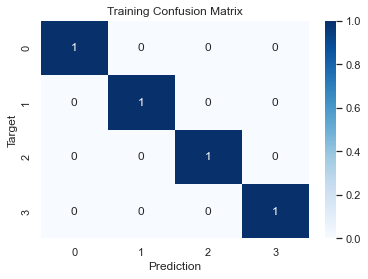

In [ ]:
et_train = model_et(X_train, y_train, name="Training")

Accuracy : 97.70%
Precison : 97.92%
Recall   : 97.70%


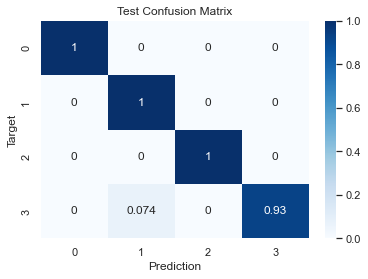

In [ ]:
et_test = model_et(X_test, y_test, name="Test")

In [ ]:
# Classification Report
print(classification_report(y_test, et_preds))

              precision    recall  f1-score   support

  GIZI_BURUK       1.00      1.00      1.00        20
 GIZI_KURANG       0.90      1.00      0.95        19
  GIZI_LEBIH       1.00      1.00      1.00        21
 GIZI_NORMAL       1.00      0.93      0.96        27

    accuracy                           0.98        87
   macro avg       0.98      0.98      0.98        87
weighted avg       0.98      0.98      0.98        87



### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr_model.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [ ]:
preds = lr_model.predict(X_test)

In [ ]:
preds

array(['GIZI_BURUK', 'GIZI_BURUK', 'GIZI_LEBIH', 'GIZI_KURANG',
       'GIZI_LEBIH', 'GIZI_NORMAL', 'GIZI_BURUK', 'GIZI_BURUK',
       'GIZI_KURANG', 'GIZI_NORMAL', 'GIZI_KURANG', 'GIZI_NORMAL',
       'GIZI_LEBIH', 'GIZI_NORMAL', 'GIZI_KURANG', 'GIZI_BURUK',
       'GIZI_LEBIH', 'GIZI_LEBIH', 'GIZI_NORMAL', 'GIZI_KURANG',
       'GIZI_KURANG', 'GIZI_KURANG', 'GIZI_LEBIH', 'GIZI_KURANG',
       'GIZI_NORMAL', 'GIZI_NORMAL', 'GIZI_BURUK', 'GIZI_NORMAL',
       'GIZI_LEBIH', 'GIZI_NORMAL', 'GIZI_LEBIH', 'GIZI_BURUK',
       'GIZI_NORMAL', 'GIZI_BURUK', 'GIZI_BURUK', 'GIZI_NORMAL',
       'GIZI_BURUK', 'GIZI_KURANG', 'GIZI_BURUK', 'GIZI_LEBIH',
       'GIZI_KURANG', 'GIZI_NORMAL', 'GIZI_KURANG', 'GIZI_BURUK',
       'GIZI_KURANG', 'GIZI_NORMAL', 'GIZI_KURANG', 'GIZI_BURUK',
       'GIZI_KURANG', 'GIZI_LEBIH', 'GIZI_LEBIH', 'GIZI_KURANG',
       'GIZI_KURANG', 'GIZI_LEBIH', 'GIZI_BURUK', 'GIZI_KURANG',
       'GIZI_BURUK', 'GIZI_LEBIH', 'GIZI_KURANG', 'GIZI_NORMAL',
       'GIZI_LEBIH', 'G

In [ ]:
def model_lr(inputs, targets, name=''):
    preds = lr_model.predict(inputs)

    accuracy = accuracy_score(targets, preds)
    print("Accuracy : {:.2f}%".format(accuracy * 100))
    print('Precison : {:.2f}%'.format(precision_score(targets, preds, average='weighted') * 100))
    print('Recall   : {:.2f}%'.format(recall_score(targets, preds, average='weighted') * 100))

    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));

    return preds

Accuracy : 96.93%
Precison : 97.04%
Recall   : 96.93%


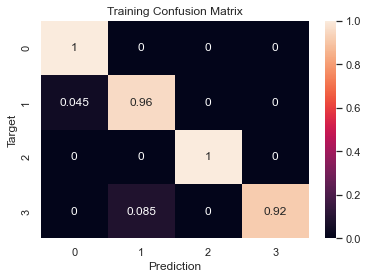

In [ ]:
train_preds = model_lr(X_train, y_train, 'Training')

Accuracy : 94.25%
Precison : 94.93%
Recall   : 94.25%


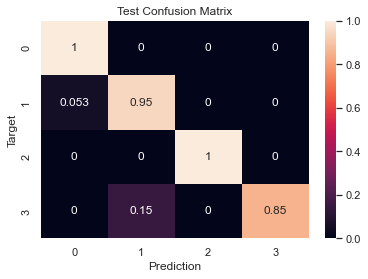

In [ ]:
test_preds = model_lr(X_test, y_test, 'Test')

### Naive Bayes Gaussian

In [ ]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
nb_mod = model_nb.predict(X_test)
nb_mod

array(['GIZI_BURUK', 'GIZI_BURUK', 'GIZI_LEBIH', 'GIZI_KURANG',
       'GIZI_LEBIH', 'GIZI_NORMAL', 'GIZI_BURUK', 'GIZI_BURUK',
       'GIZI_KURANG', 'GIZI_NORMAL', 'GIZI_KURANG', 'GIZI_KURANG',
       'GIZI_LEBIH', 'GIZI_KURANG', 'GIZI_KURANG', 'GIZI_BURUK',
       'GIZI_LEBIH', 'GIZI_LEBIH', 'GIZI_KURANG', 'GIZI_KURANG',
       'GIZI_KURANG', 'GIZI_KURANG', 'GIZI_LEBIH', 'GIZI_KURANG',
       'GIZI_KURANG', 'GIZI_KURANG', 'GIZI_BURUK', 'GIZI_NORMAL',
       'GIZI_LEBIH', 'GIZI_NORMAL', 'GIZI_LEBIH', 'GIZI_BURUK',
       'GIZI_NORMAL', 'GIZI_BURUK', 'GIZI_BURUK', 'GIZI_NORMAL',
       'GIZI_BURUK', 'GIZI_KURANG', 'GIZI_BURUK', 'GIZI_LEBIH',
       'GIZI_KURANG', 'GIZI_KURANG', 'GIZI_KURANG', 'GIZI_BURUK',
       'GIZI_KURANG', 'GIZI_KURANG', 'GIZI_KURANG', 'GIZI_BURUK',
       'GIZI_KURANG', 'GIZI_LEBIH', 'GIZI_LEBIH', 'GIZI_KURANG',
       'GIZI_KURANG', 'GIZI_LEBIH', 'GIZI_BURUK', 'GIZI_KURANG',
       'GIZI_BURUK', 'GIZI_LEBIH', 'GIZI_KURANG', 'GIZI_NORMAL',
       'GIZI_LEBIH', 'G

In [ ]:
def nb_model(inputs, targets, name=''):
    pred_nb = model_nb.predict(inputs)
    accuracy_nb = accuracy_score(targets,pred_nb)
    print("Accuracy : {:.2f}%".format(accuracy_nb * 100))
    print('Precison : {:.2f}%'.format(precision_score(targets, pred_nb, average='weighted') * 100))
    print('Recall   : {:.2f}%'.format(recall_score(targets, pred_nb, average='weighted') * 100))

    cm = confusion_matrix(targets, pred_nb, normalize='true')
    plt.figure()
    sns.heatmap(cm, annot=True, cmap='YlOrBr')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    return pred_nb

Accuracy : 87.74%
Precison : 91.15%
Recall   : 87.74%


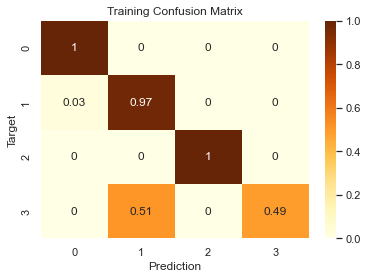

In [ ]:
# Train Naive Bayes
train_nb = nb_model(X_train, y_train, 'Training')

Accuracy : 81.61%
Precison : 88.98%
Recall   : 81.61%


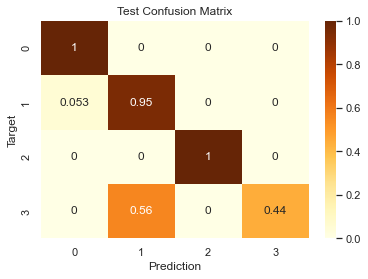

In [ ]:
# Prediksi Naive Bayes
nb_pred = nb_model(X_test, y_test, 'Test')

In [ ]:
# Classification Report
print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

  GIZI_BURUK       0.95      1.00      0.98        20
 GIZI_KURANG       0.55      0.95      0.69        19
  GIZI_LEBIH       1.00      1.00      1.00        21
 GIZI_NORMAL       1.00      0.44      0.62        27

    accuracy                           0.82        87
   macro avg       0.87      0.85      0.82        87
weighted avg       0.89      0.82      0.81        87



### Ada Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)

AdaBoostClassifier()

In [ ]:
ada_preds = ada_model.predict(X_test)
ada_preds

array(['GIZI_BURUK', 'GIZI_KURANG', 'GIZI_LEBIH', 'GIZI_KURANG',
       'GIZI_LEBIH', 'GIZI_KURANG', 'GIZI_BURUK', 'GIZI_BURUK',
       'GIZI_KURANG', 'GIZI_KURANG', 'GIZI_KURANG', 'GIZI_KURANG',
       'GIZI_LEBIH', 'GIZI_KURANG', 'GIZI_KURANG', 'GIZI_BURUK',
       'GIZI_LEBIH', 'GIZI_LEBIH', 'GIZI_KURANG', 'GIZI_KURANG',
       'GIZI_KURANG', 'GIZI_KURANG', 'GIZI_LEBIH', 'GIZI_KURANG',
       'GIZI_KURANG', 'GIZI_KURANG', 'GIZI_BURUK', 'GIZI_KURANG',
       'GIZI_LEBIH', 'GIZI_KURANG', 'GIZI_LEBIH', 'GIZI_BURUK',
       'GIZI_KURANG', 'GIZI_BURUK', 'GIZI_BURUK', 'GIZI_KURANG',
       'GIZI_BURUK', 'GIZI_KURANG', 'GIZI_BURUK', 'GIZI_LEBIH',
       'GIZI_KURANG', 'GIZI_KURANG', 'GIZI_KURANG', 'GIZI_BURUK',
       'GIZI_KURANG', 'GIZI_KURANG', 'GIZI_KURANG', 'GIZI_BURUK',
       'GIZI_KURANG', 'GIZI_LEBIH', 'GIZI_LEBIH', 'GIZI_KURANG',
       'GIZI_KURANG', 'GIZI_LEBIH', 'GIZI_BURUK', 'GIZI_KURANG',
       'GIZI_BURUK', 'GIZI_LEBIH', 'GIZI_KURANG', 'GIZI_KURANG',
       'GIZI_LEBIH', '

In [ ]:
def model_ada(inputs, targets, name='' ):
    pred_ada = ada_model.predict(inputs)
    accuracy_ada = accuracy_score(targets, pred_ada)
    print("Accuracy : {:.2f}%".format(accuracy_ada * 100))
    print('Precison : {:.2f}%'.format(precision_score(targets, pred_ada, average='weighted') * 100))
    print('Recall   : {:.2f}%'.format(recall_score(targets, pred_ada, average='weighted') * 100))

    cm = confusion_matrix(targets, pred_ada, normalize='true')
    plt.figure()
    sns.heatmap(cm, annot=True, cmap='Blues')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    return pred_ada

Accuracy : 77.39%
Precison : 65.37%
Recall   : 77.39%


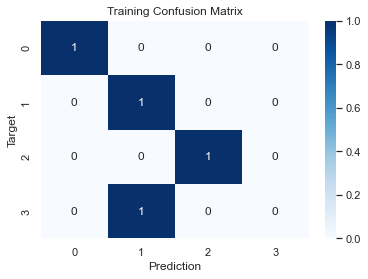

In [ ]:
train_ada = model_ada(X_train, y_train, name="Training")

Accuracy : 68.97%
Precison : 56.15%
Recall   : 68.97%


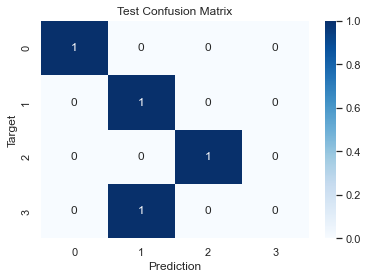

In [ ]:
pred_ada = model_ada(X_test, y_test, 'Test')

In [ ]:
# Classification Report
print(classification_report(y_test, ada_preds))

              precision    recall  f1-score   support

  GIZI_BURUK       1.00      1.00      1.00        20
 GIZI_KURANG       0.41      1.00      0.58        19
  GIZI_LEBIH       1.00      1.00      1.00        21
 GIZI_NORMAL       0.00      0.00      0.00        27

    accuracy                           0.69        87
   macro avg       0.60      0.75      0.65        87
weighted avg       0.56      0.69      0.60        87



### SVM

In [ ]:
from sklearn.svm import SVC
model_svm = SVC()
model_svm.fit(X_train, y_train)

SVC()

In [ ]:
#buat fungsi untuk visualisasi confusion matrixnya
def svm_model(inputs, targets, name=''):
    pred_svm = model_svm.predict(inputs)
    accuracy_svm = accuracy_score(targets, pred_svm)
    print("Accuracy: {:.2f}%".format(accuracy_svm * 100))
    print('Precision: {:.2f}%'.format(precision_score(targets, pred_svm, average='weighted') * 100))
    print('Recall: {:.2f}%'.format(recall_score(targets, pred_svm, average='weighted') * 100))

    cm = confusion_matrix(targets, pred_svm, normalize='true')
    plt.figure()
    sns.heatmap(cm, annot=True, cmap='viridis')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name))
    plt.show()
    return pred_svm

Accuracy: 98.08%
Precision: 98.12%
Recall: 98.08%


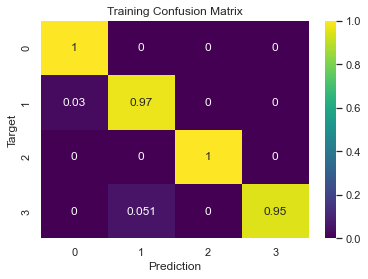

In [ ]:
train_svm = svm_model(X_train, y_train, 'Training')

Accuracy: 93.10%
Precision: 93.90%
Recall: 93.10%


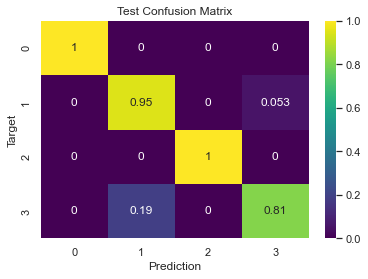

In [ ]:
pred_svm = svm_model(X_test, y_test, 'Test')

In [ ]:
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

  GIZI_BURUK       1.00      1.00      1.00        20
 GIZI_KURANG       0.78      0.95      0.86        19
  GIZI_LEBIH       1.00      1.00      1.00        21
 GIZI_NORMAL       0.96      0.81      0.88        27

    accuracy                           0.93        87
   macro avg       0.93      0.94      0.93        87
weighted avg       0.94      0.93      0.93        87



### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
knn_model = model_knn.predict(X_test)
knn_model

array(['GIZI_BURUK', 'GIZI_KURANG', 'GIZI_LEBIH', 'GIZI_KURANG',
       'GIZI_LEBIH'], dtype=object)

In [ ]:
def knn_model(inputs, targets, name=''):
    pred_knn = model_knn.predict(inputs)
    accuracy_knn = accuracy_score(targets,pred_knn)
    print("Accuracy     : {:.2f}%".format(accuracy_knn * 100))
    print('Precision    : {:.2f}%'.format(precision_score(targets, pred_knn, average='weighted') * 100))
    print('Recall       : {:.2f}%'.format(recall_score(targets, pred_knn, average='weighted') * 100))

    cm = confusion_matrix(targets, pred_knn, normalize='true')
    plt.figure()
    sns.heatmap(cm, annot=True, cmap='plasma')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    return pred_knn

Accuracy     : 94.64%
Precision    : 94.75%
Recall       : 94.64%


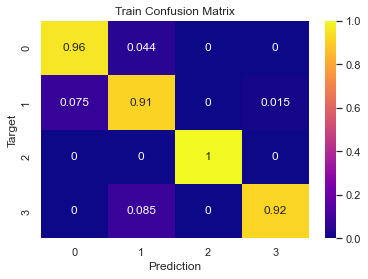

In [ ]:
knn_train = knn_model(X_train, y_train, name='Train')

Accuracy     : 88.51%
Precision    : 90.19%
Recall       : 88.51%


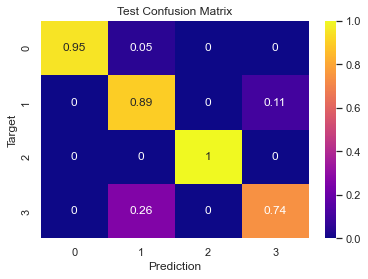

In [ ]:
knn_pred = knn_model(X_test, y_test, name='Test')

In [ ]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

  GIZI_BURUK       1.00      0.95      0.97        20
 GIZI_KURANG       0.68      0.89      0.77        19
  GIZI_LEBIH       1.00      1.00      1.00        21
 GIZI_NORMAL       0.91      0.74      0.82        27

    accuracy                           0.89        87
   macro avg       0.90      0.90      0.89        87
weighted avg       0.90      0.89      0.89        87



## Hyperparameter Tuning

hyperparameternya pake GridSearch, ada satu lagi namanya random search tapi gridsearch lebih baik. cari jurnal yg bagus bagusin gridsearch pasti banyak.

### Hyperparameter Tuning KNN

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#ini parameter untuk gridsearch, dipake semua parameter KNNnya
param_knn = {
    'n_neighbors': np.arange(1, 10),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'metric': ['euclidean', 'manhattan', 'minkowski']}

**Cari tentang semua ini untuk dasar teori**
ada kalkulasinya lebih baik
1. n_neighbors: Jumlah tetangga terdekat yang akan digunakan untuk mengklasifikasikan setiap sampel.

2. weights: Mengatur cara memberikan bobot pada tetangga terdekat. Beberapa opsi yang dipake adalah:
* 'uniform': Memberikan bobot yang sama pada semua tetangga terdekat.
* 'distance': Memberikan bobot yang berbanding terbalik dengan jarak. Tetangga yang lebih dekat akan memiliki pengaruh yang lebih besar pada klasifikasi.

3. algorithm: Algoritma yang digunakan untuk menghitung tetangga terdekat. Beberapa opsi adalah:
* 'auto': Algoritma akan memilih algoritma terbaik berdasarkan jenis masukan.
* 'ball_tree': Menggunakan struktur data BallTree untuk menghitung tetangga terdekat.
* 'kd_tree': Menggunakan struktur data KDTree untuk menghitung tetangga terdekat.
* 'brute': Menggunakan pencarian brute force untuk menghitung tetangga terdekat.

4. metric: **(pelajaran Bu Ina)** Metrik jarak yang digunakan untuk mengukur jarak antara sampel. Beberapa metrik yang umum digunakan dalam KNN adalah:
* 'euclidean': Menggunakan jarak Euclidean.
* 'manhattan': Menggunakan jarak Manhattan.
* 'minkowski': Menggunakan jarak Minkowski dengan parameter p.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
%%time
grid_knn = GridSearchCV(KNeighborsClassifier(), param_knn, scoring='accuracy', n_jobs=-1)
grid_knn.fit(X_train, y_train)

CPU times: total: 2.64 s
Wall time: 51.6 s


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
print("Best Hyperparameters:", grid_knn.best_params_)
print("Best Accuracy:", grid_knn.best_score_)

Best Hyperparameters: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}
Best Accuracy: 0.9232946298984036


In [ ]:
# Hasil Grid Search dalam bentuk DataFrame
results_knn = pd.DataFrame(grid_knn.cv_results_)

In [ ]:
pred_grid_knn = grid_knn.predict(X_test)

In [ ]:
def grid_knn_model(inputs, targets, name=''):
    pred_knn = grid_knn.predict(inputs)
    accuracy_knn = accuracy_score(targets,pred_knn)
    print("Accuracy     : {:.2f}%".format(accuracy_knn * 100))
    print('Precision    : {:.2f}%'.format(precision_score(targets, pred_knn, average='weighted') * 100))
    print('Recall       : {:.2f}%'.format(recall_score(targets, pred_knn, average='weighted') * 100))

    cm = confusion_matrix(targets, pred_knn, normalize='true')
    plt.figure()
    sns.heatmap(cm, annot=True, cmap='viridis')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    return pred_knn

Accuracy     : 100.00%
Precision    : 100.00%
Recall       : 100.00%


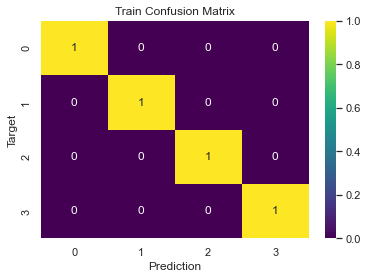

In [ ]:
# Train
knn_train = grid_knn_model(X_train, y_train, name='Train')

Accuracy     : 93.10%
Precision    : 93.90%
Recall       : 93.10%


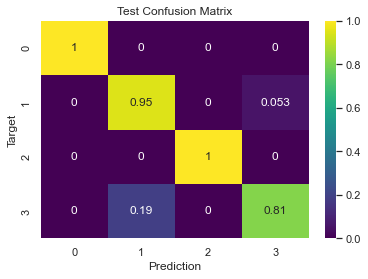

In [ ]:
# Test
knn_pred = grid_knn_model(X_test, y_test, name='Test')

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_grid_knn))

              precision    recall  f1-score   support

  GIZI_BURUK       1.00      1.00      1.00        20
 GIZI_KURANG       0.78      0.95      0.86        19
  GIZI_LEBIH       1.00      1.00      1.00        21
 GIZI_NORMAL       0.96      0.81      0.88        27

    accuracy                           0.93        87
   macro avg       0.93      0.94      0.93        87
weighted avg       0.94      0.93      0.93        87



### Hyperparameter Tuning SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
param_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

**Cari juga yaa dasar teori tentang ini**
1. C (Regularization Parameter):
Hyperparameter C mengendalikan penalti untuk kesalahan klasifikasi pada data latih. Nilai C yang lebih besar menunjukkan penalti yang lebih tinggi, sehingga model akan berusaha untuk mendapatkan batas keputusan (hyperplane) yang sesuai dengan data latih sebaik mungkin, bahkan jika batas tersebut sedikit menimbulkan kesalahan klasifikasi pada data latih. C yang lebih kecil akan menciptakan batas keputusan yang lebih lebar dan dapat menoleransi beberapa kesalahan klasifikasi pada data latih. Nilai C yang tidak terlalu besar atau terlalu kecil harus dipilih untuk menghindari overfitting atau underfitting.

2. kernel (Kernel Function):
Kernel function digunakan untuk melakukan pemetaan data ke dimensi yang lebih tinggi, di mana data mungkin lebih dapat dipisahkan secara linear. Kernel umum yang digunakan adalah 'linear', 'poly' (polynomial), 'rbf' (radial basis function), dan 'sigmoid'. 'Linear' menghasilkan pemetaan linear tanpa transformasi, sedangkan kernel lain menghasilkan pemetaan non-linear. Pemilihan kernel akan sangat mempengaruhi kemampuan SVM dalam menangani data yang kompleks dan tidak linear.

3. gamma:
Hyperparameter gamma mempengaruhi bentuk dari fungsi kernel 'rbf', 'poly', dan 'sigmoid'. Nilai gamma yang lebih besar menyebabkan model lebih peka terhadap data latih, yang dapat menyebabkan overfitting. Sebaliknya, nilai gamma yang lebih kecil membuat model kurang peka terhadap data latih dan mungkin menyebabkan underfitting.

In [ ]:
grid_svm = GridSearchCV(SVC(), param_grid=param_svm, scoring='accuracy')

In [ ]:
%%time
grid_svm.fit(X_train, y_train)

CPU times: total: 1.5 s
Wall time: 1.93 s


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [ ]:
print("Best Hyperparameters:", grid_svm.best_params_)
print("Best Accuracy:", grid_svm.best_score_)

Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best Accuracy: 0.9923076923076923


In [ ]:
def grid_svm_model(inputs, targets, name='' ):
    pred_svm = grid_svm.predict(inputs)
    accuracy_svm = accuracy_score(targets, pred_svm)
    print("Accuracy : {:.2f}%".format(accuracy_svm * 100))
    print('Precison : {:.2f}%'.format(precision_score(targets, pred_svm, average='weighted') * 100))
    print('Recall   : {:.2f}%'.format(recall_score(targets, pred_svm, average='weighted') * 100))

    cm = confusion_matrix(targets, pred_svm, normalize='true')
    plt.figure()
    sns.heatmap(cm, annot=True, cmap='PuBu')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    return pred_svm

Accuracy : 100.00%
Precison : 100.00%
Recall   : 100.00%


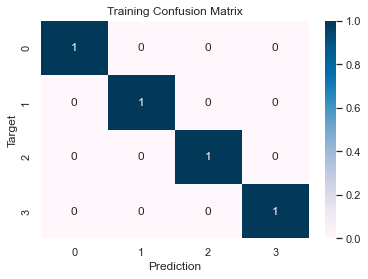

In [ ]:
train_svm = grid_svm_model(X_train, y_train, 'Training')

Accuracy : 98.85%
Precison : 98.91%
Recall   : 98.85%


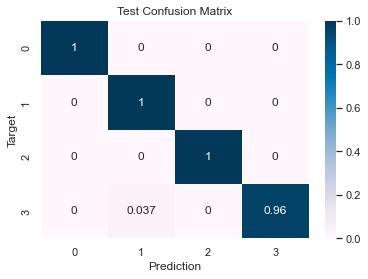

In [ ]:
pred_svm = grid_svm_model(X_test, y_test, 'Test')

In [ ]:
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

  GIZI_BURUK       1.00      1.00      1.00        20
 GIZI_KURANG       0.95      1.00      0.97        19
  GIZI_LEBIH       1.00      1.00      1.00        21
 GIZI_NORMAL       1.00      0.96      0.98        27

    accuracy                           0.99        87
   macro avg       0.99      0.99      0.99        87
weighted avg       0.99      0.99      0.99        87



### Hyperparameter Tuning Ada Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150],     # Jumlah estimator (weak learner) dalam ensemble
    'learning_rate': [0.01, 0.1, 1.0],  # Tingkat pembelajaran untuk setiap estimator
    'algorithm': ['SAMME', 'SAMME.R']   # Algoritma untuk menghitung bobot estimator
}

**yak cari lagi yaa jurnal tentang ini**
1. n_estimators:
Hyperparameter n_estimators mengontrol jumlah estimator (weak learner) yang akan digunakan dalam ensemble. Estimator ini adalah model yang relatif sederhana yang digunakan untuk melakukan prediksi pada data latih. Semakin banyak estimator, semakin kuat kecenderungannya untuk menghasilkan model yang lebih kuat. Namun, penambahan estimator yang berlebihan dapat menyebabkan overfitting.

2. learning_rate:
Hyperparameter learning_rate mengontrol kontribusi dari setiap estimator terhadap ensemble. Semakin kecil nilai learning_rate, semakin kecil kontribusi setiap estimator, dan semakin lambat konvergensi proses pembelajaran. Penggunaan learning rate yang lebih kecil biasanya diimbangi dengan peningkatan jumlah estimator untuk mempertahankan performa ensemble.

3. algorithm:
Hyperparameter algorithm digunakan untuk mengatur algoritma yang digunakan dalam menghitung bobot dari setiap estimator. Ada dua opsi yang umum digunakan: "SAMME" dan "SAMME.R". "SAMME" adalah algoritma yang digunakan untuk klasifikasi dengan output berupa kelas diskrit, sedangkan "SAMME.R" adalah versi yang digunakan ketika output adalah nilai probabilitas.

In [ ]:
%%time
grid_ada = GridSearchCV(AdaBoostClassifier(), param_grid, cv=5, n_jobs=-1)
grid_ada.fit(X_train, y_train)

CPU times: total: 875 ms
Wall time: 53.7 s


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 150]})

In [ ]:
print("Best Hyperparameters:", grid_ada.best_params_)
print("Best Accuracy:", grid_ada.best_score_)

Best Hyperparameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.01, 'n_estimators': 50}
Best Accuracy: 0.988534107402032


In [ ]:
ada_model = AdaBoostClassifier(algorithm= 'SAMME.R', learning_rate= 0.01, n_estimators= 50)
ada_model.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.01)

In [ ]:
def grid_ada_model(inputs, targets, name=''):
    pred_ada = grid_ada.predict(inputs)
    accuracy_ada = accuracy_score(targets,pred_ada)
    print("Accuracy : {:.2f}%".format(accuracy_ada * 100))
    print('Precison : {:.2f}%'.format(precision_score(targets, pred_ada, average='weighted') * 100))
    print('Recall   : {:.2f}%'.format(recall_score(targets, pred_ada, average='weighted') * 100))

    cm = confusion_matrix(targets, pred_ada, normalize='true')
    plt.figure()
    sns.heatmap(cm, annot=True, cmap='plasma')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    return pred_ada

Accuracy : 100.00%
Precison : 100.00%
Recall   : 100.00%


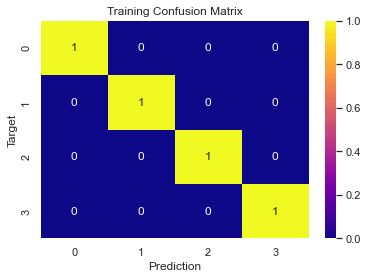

In [ ]:
train_ada = grid_ada_model(X_train, y_train, 'Training')

Accuracy : 100.00%
Precison : 100.00%
Recall   : 100.00%


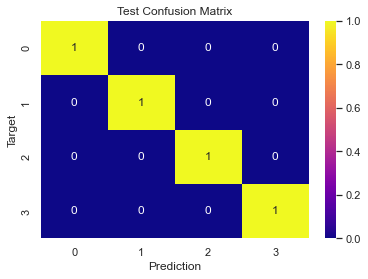

In [ ]:
ada_pred = grid_ada_model(X_test, y_test, 'Test')

In [ ]:
print(classification_report(y_test, ada_pred))

              precision    recall  f1-score   support

  GIZI_BURUK       1.00      1.00      1.00        20
 GIZI_KURANG       1.00      1.00      1.00        19
  GIZI_LEBIH       1.00      1.00      1.00        21
 GIZI_NORMAL       1.00      1.00      1.00        27

    accuracy                           1.00        87
   macro avg       1.00      1.00      1.00        87
weighted avg       1.00      1.00      1.00        87



ningkatnya sih jauh sih sebelum di hyperparameter tuning, tapi malah ada indikasi overfitting nih setelah di hyperparameter tuning. oke gpp